In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as math

import scipy.integrate as integrate
import scipy.special as special
#import scipy.interpolate as interpolate #CubicSpline

import importlib

In [2]:
import Functions_Xyloportas as f # All functions we will use

In [308]:
# Update any changes in Functions_Xyloportas.py file
importlib.reload(f)
#help(f)

<module 'Functions_Xyloportas' from 'C:\\Users\\XYLOPORTAS\\Desktop\\Φυσικό ΕΚΠΑ (2020-2024)\\8ο Εξάμηνο\\Πτυχιακή Εργασία\\Latex_code\\Functions_Xyloportas.py'>

## Part 1: Introduction (Synchrotron Radiation)

$\gamma = (1-v^2/c^2)^{-1/2}$

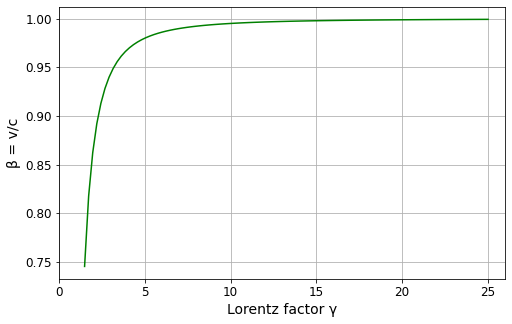

In [313]:
# β = v/c as a function of the Lorentz factor γ
gamma_array = np.linspace(1.5,25,100) # γ
beta_array = [0]*len(gamma_array)
for i in range(len(gamma_array)):
    beta_array[i] = f.Beta(gamma_array[i]) # β

fig = plt.figure(figsize=(8,5))
plt.plot(gamma_array,beta_array, c="green")
plt.grid()
plt.xlabel("Lorentz factor γ", fontsize=14)
plt.ylabel("β = v/c", fontsize=14)
plt.xlim(0,26)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.savefig('Lorentz.png')

$\gamma(t) = \frac{\gamma_o}{1+A\gamma_o t} = \frac{\gamma_o}{1+t/t_{syn}} \quad , \quad A = \frac{4\sigma_T u_B c}{3mc^2}=\frac{\sigma_{T} B^2}{6 mc}$

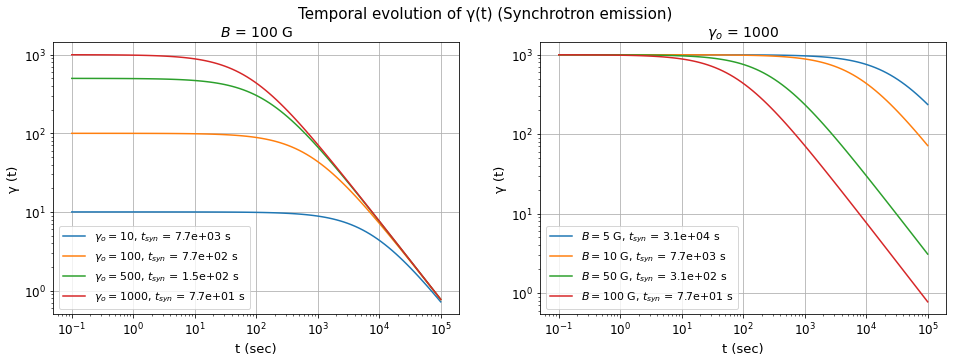

In [315]:
# Temporal evolution of γ(t) because of Synchrotron radiation [same B]
go_array = [10,100,500,1000] # γ_ο = γ(t=0)
B = 100 # Gauss
tsyn1 = [f.time_synB(g,B) for g in go_array] # t_syn (γ_ο)
tt = np.logspace(-1,5,100) # sec
g_t_array1 = [0]*len(go_array) # γ(t) array for every γ_ο
for i in range(len(go_array)):
    g_t_array1[i] = [f.g_evolutionB(go_array[i],t,B) for t in tt] # γ(t)

# Temporal evolution of γ(t) because of Synchrotron radiation [same γ]
g = 10**3 # γ_ο = γ(t=0)
B_array = [5,10,50,100] # Gauss
tsyn2 = [f.time_synB(g,B) for B in B_array] # t_syn (γ_ο)
tt = np.logspace(-1,5,100) # sec
g_t_array2 = [0]*len(B_array) # γ(t) array for every B
for i in range(len(go_array)):
    g_t_array2[i] = [f.g_evolutionB(g,t,B_array[i]) for t in tt] # γ(t)

# Plots
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16,5)
fig.suptitle('Temporal evolution of γ(t) (Synchrotron emission)', fontsize=15)

for i in range(len(go_array)):
    ax[0].plot(tt,g_t_array1[i], label="$γ_ο = $"+"{:0.0f}, ".format(go_array[i]) + "$t_{syn}$"+" = {:0.1e} s".format(tsyn1[i]))
    ax[1].plot(tt,g_t_array2[i], label="$B = $"+"{:0.0f} G, ".format(B_array[i]) + "$t_{syn}$"+" = {:0.1e} s".format(tsyn2[i]))

ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].grid()
ax[0].legend(fontsize=11)
ax[0].set_title("$B$ = {:0.0f} G".format(B), fontsize=14)
ax[0].set_xlabel("t (sec)", fontsize=13)
ax[0].set_ylabel("γ (t)", fontsize=13)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[1].set_yscale("log")
ax[1].set_xscale("log")
ax[1].grid()
ax[1].legend(fontsize=11)
ax[1].set_title("$γ_ο$ = {:0.0f}".format(g), fontsize=14)
ax[1].set_xlabel("t (sec)", fontsize=13)
ax[1].set_ylabel("γ (t)", fontsize=13)
ax[1].tick_params(axis='both', which='major', labelsize=12)

#plt.savefig('g(t)_Theory.png')

$F(x) = x \int_{x}^{\infty} K_{5/3} (\xi) \,d\xi$

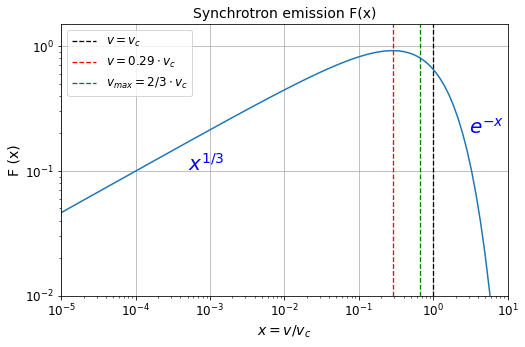

In [317]:
# Synchrotron emission spectrum F(x)

xx = np.logspace(-5,1,100) # x = v/v_c
Fx = [f.Fx_sim(x) for x in xx]

fig = plt.figure(figsize=(8,5))
plt.axvline(1, c='k', linestyle ='--', linewidth=1.3, label = "$v=v_c$") # v = v_c (x=1)
plt.axvline(0.29, c='r', linestyle ='--', linewidth=1.3, label = "$v=0.29 \cdot v_c$") # v_peak
plt.axvline(2/3, c='g', linestyle ='--', linewidth=1.3, label = "$v_{max}= 2/3 \cdot v_c$") # v_max = 2/3 v_c
plt.plot(xx,Fx)
plt.text(3,0.20,"$e^{-x}$", c='b', fontsize=20)
plt.text(0.0005,0.1,"$x^{1/3}$", c='b', fontsize=20)

plt.grid()
plt.xlabel("$x = v/v_c$", fontsize=14)
plt.ylabel("F (x)", fontsize=14)
plt.ylim(10**-2,1.5)
plt.xlim(10**-5,10**1)
plt.yscale("log")
plt.xscale("log")
plt.title("Synchrotron emission F(x)", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.legend(fontsize=12)
#plt.savefig('F(x).png')

C:\Users\XYLOPORTAS\Desktop\Φυσικό ΕΚΠΑ (2020-2024)\8ο Εξάμηνο\Πτυχιακή Εργασία\Latex_code\Functions_Xyloportas.py:49: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return x*integrate.quad(lambda y: special.kv(5/3,y), x, np.inf)[0]


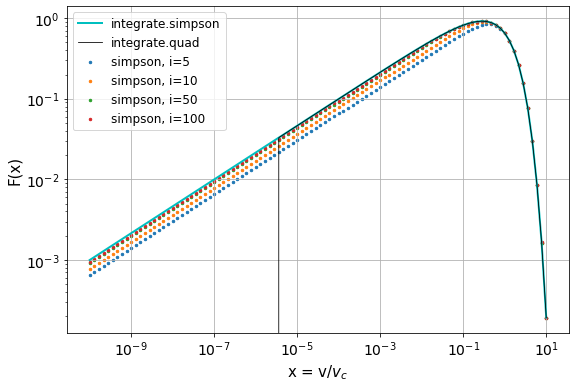

In [329]:
# F(x) calculation & approximation
# F(x): test different upper limits for integrate.simpson
xx = np.logspace(-10,1,100)
Fx_QU = [f.Fx_quad(x) for x in xx] #integrate.quad
Fx_SI = [f.Fx_sim(x) for x in xx] #integrate.simpson (upper limit = 50+x)

figSI = plt.figure(figsize=(9,6))
plt.plot(xx,Fx_SI, label="integrate.simpson", c='c', linewidth=2)
plt.plot(xx,Fx_QU, label="integrate.quad", c='k', linewidth=0.8)

upper = [5,10,50,100] # integral's upper limit in integrate.simpson: 'upper*x'
for i in upper:
    Fx_SI_test = [f.Fx_sim_test(x,i) for x in xx] 
    plt.scatter(xx,Fx_SI_test, label="simpson, i={:0.0f}" .format(i), s=6)

plt.grid()
plt.xlabel("x = v/$v_c$", fontsize=15)
plt.ylabel("F(x)", fontsize=15)
plt.yscale("log")
plt.xscale("log")
#plt.title("F(x) numerical calculation - integrate.simpson")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=12)
#plt.savefig('F(x)_Simpson.png')

A approximation valid for all frequencies, but overestimating F(x) around the peak, is: <br>
$F(\nu/\nu_c) \sim \dfrac{4\pi}{\sqrt{3}\Gamma(1/3)} \left( \dfrac{\nu}{2\nu_c} \right)^{1/3} e^{-\nu/\nu_c}$

C:\Users\XYLOPORTAS\Desktop\Φυσικό ΕΚΠΑ (2020-2024)\8ο Εξάμηνο\Πτυχιακή Εργασία\Latex_code\Functions_Xyloportas.py:49: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return x*integrate.quad(lambda y: special.kv(5/3,y), x, np.inf)[0]


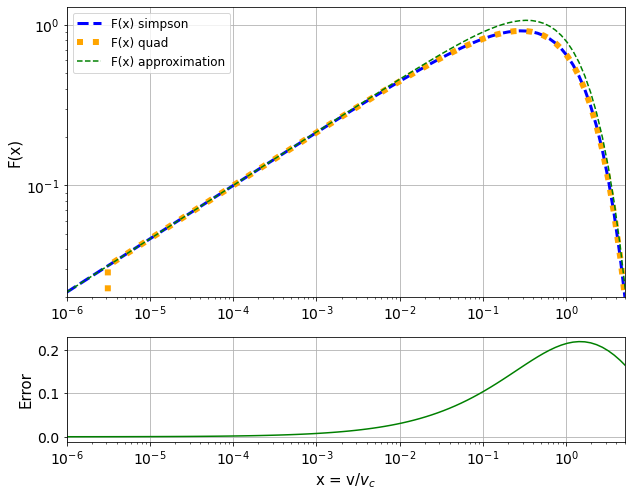

In [327]:
# F(x) calculation & approximation
xx = np.logspace(-6,1,100)
Fx_QU = [f.Fx_quad(x) for x in xx] # Doesn't work for x < 0.3*10^(-5)
Fx_SI = [f.Fx_sim(x) for x in xx] # Works for every x
Fx_APPROX = [f.Fx_approx(x) for x in xx] # Approximate formuala for F(x)
error = [0]*len(Fx_SI)
for i in range(len(Fx_SI)):
    error[i] = (Fx_APPROX[i] - Fx_SI[i]) / Fx_SI[i] # relative error of F(x) approximation

# Plots
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1.8]})
fig.set_size_inches(10,8)
ax[0].plot(xx,Fx_SI, label="F(x) simpson", linestyle="--", c='b', linewidth=3)
ax[0].plot(xx,Fx_QU, label="F(x) quad", linestyle=":", c='orange', linewidth=6)
ax[0].plot(xx,Fx_APPROX, label="F(x) approximation", linestyle="--", c='g') 
ax[0].set_yscale("log")
ax[0].set_xscale("log")
ax[0].grid()
ax[0].legend(fontsize=12)
ax[0].set_ylabel("F(x)", fontsize=15)
ax[0].set_xlim(10**-6,10**0.7)
ax[0].set_ylim(2*10**-2,1.3*10**0)
ax[0].tick_params(axis='both', which='major', labelsize=14)

ax[1].plot(xx,error, c='g')
ax[1].set_xscale("log")
ax[1].grid()
ax[1].set_xlabel("x = v/$v_c$", fontsize=15)
ax[1].set_ylabel("Error", fontsize=15)
ax[1].set_xlim(10**-6,10**0.7)
ax[1].tick_params(axis='both', which='major', labelsize=14)
#plt.savefig('F(x)_methods.png')

## Part 2: Kinetic Equation solutions $N(\gamma,t)$

In [330]:
from matplotlib.colors import Normalize
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable

$\dfrac{dN(\gamma,t)}{dt} = 2A\gamma(t) N(\gamma,t) + Q_{inj}(\gamma,t)$ <br>
$ \Rightarrow N(\gamma,t) = \int_{0}^{t} Q_{inj}(\gamma_o,t_o) \, N_{hom}(\gamma,t) \, d t_o = \int_{0}^{t} Q(\gamma_o,t_o) (1+A\gamma_ot)^2 dt_o = \int_{0}^{t} Q(\gamma_o,t_o) \left(\frac{\gamma_o}{\gamma}\right)^2 dt_o $

### I: Instant injection of monoenergetic particles

$N(\gamma,t) = Q_o (1+\gamma_\star At)^2 = Q_o \left(\dfrac{\gamma_\star}{\gamma}\right)^2 \qquad,\qquad  \gamma = \dfrac{\gamma_\star}{1+\gamma_\star At} \le \gamma_\star $

In [331]:
g_star = 10**4 # γ = 10^4
B_star = 10 # Β = 10 Gauss
Qo = 1 # 1 particle
print("t_{syn} = %0.2e sec" %(f.time_synB(g_star,B_star)))
t_syn_star = f.time_synB(g_star,B_star)

t_{syn} = 7.74e+02 sec


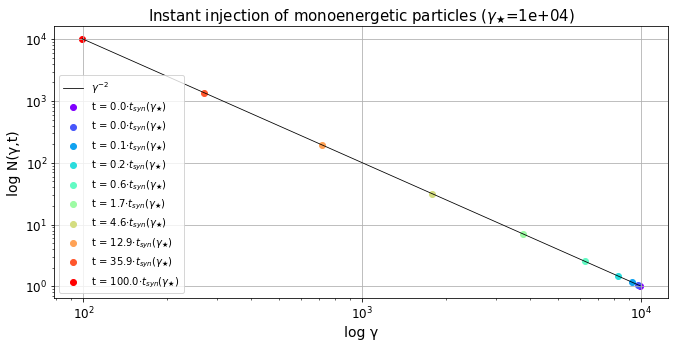

In [332]:
# Plot N(γ,t)
times_syn = np.logspace(-2,2,10) # t/t_(syn)
times = [0]*len(times_syn) # sec
for i in range(len(times_syn)):
    times[i] = times_syn[i]*t_syn_star # sec
g_t = [f.g_evolutionB(g_star,x,B_star) for x in times]  # γ(t)
N_t = [f.N_instant_mono(gg,Qo,g_star) for gg in g_t] # N(γ,t)

fig = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("log γ", fontsize=14)
plt.ylabel("log N(γ,t)", fontsize=14)
plt.title("Instant injection of monoenergetic particles ($γ_★$={:0.0e})" .format(g_star), fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

x = np.linspace(min(g_t),max(g_t),100)
y = (g_star/x)**2
plt.plot(x,y,c='k',linewidth=0.8, label="$γ^{-2}$")

n = len(times)
color = iter(plt.cm.rainbow(np.linspace(0, 1, n)))
for i in range(n):
    c = next(color)
    plt.scatter(g_t[i],N_t[i],color=c, label="t = {:0.1f}" .format(times_syn[i]) + "$ \cdot t_{syn} (γ_★)$")
plt.legend()

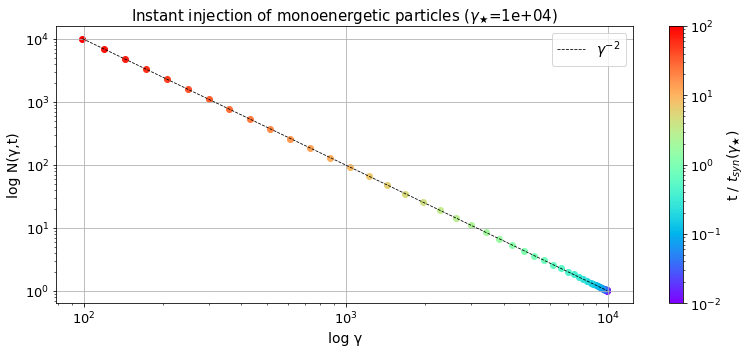

In [345]:
# Plot N(γ,t) with colorbar
times_syn = np.logspace(-2,2,50) # t/t_(syn)
times = [0]*len(times_syn) # sec
for i in range(len(times_syn)):
    times[i] = times_syn[i]*t_syn_star # sec
g_t = [f.g_evolutionB(g_star,x,B_star) for x in times]  # γ(t)
N_t = [f.N_instant_mono(gg,Qo,g_star) for gg in g_t] # N(γ,t)

fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)  # Create a single subplot
plt.grid()
plt.xlabel("log γ", fontsize=14)
plt.ylabel("log N(γ,t)", fontsize=14)
plt.title("Instant injection of monoenergetic particles ($γ_★$={:0.0e})" .format(g_star), fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

# γ^-2
x = np.linspace(min(g_t),max(g_t),100)
y = (g_star/x)**2
plt.plot(x,y,c='k',linewidth=0.8, linestyle='--', label="$γ^{-2}$")

# Create a colormap
n = len(times_syn)
cmap = plt.cm.rainbow
#norm = Normalize(vmin=min(times_syn), vmax=max(times_syn)) 
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale)

for i in range(n):
    #c = cmap(norm(times_syn[i]))  # Map time to a color
    plt.scatter(g_t[i], N_t[i], c=[times_syn[i]], cmap=cmap, norm=log_norm)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(times_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_★)$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig('N(g,t)_case1.png')

### II: Continuous injection of monoenergetic particles

$N(\gamma,t) = Q_o \dfrac{(1+\gamma_\star At)^2}{A\gamma_\star^2} = Q_o \dfrac{1}{A\gamma^2} \qquad,\qquad \frac{\gamma_\star}{1+A\gamma_\star t}=\gamma_{min}(t) \le \gamma(t) \le \gamma_\star$

In [346]:
g_star = 10**4 # γ = 10^4
B_star = 10 # Β = 10 Gauss

m = 9.10956*(10**-28) # mass of particles (electron)
q = 4.80325*(10**-10) # charge of particles (electron)
st = 0.665245*(10**-24) # Thomson scattering cross section
c = 2.997925*(10**10) # speed of light
#uB = (B_star**2)/(8*np.pi) # magnetic field energy
#wB = (q*B_star)/(m*c) # ω_B gyro-frequency
A_star = (st*(B_star**2))/(6*np.pi*m*c)

Qo = 1 # 1 particle
t_syn_star = f.time_synB(g_star,B_star)
print("t_{syn} = %0.2e sec" %t_syn_star)
print("A = %0.2e sec^-1" %A_star)

t_{syn} = 7.74e+02 sec
A = 1.29e-07 sec^-1


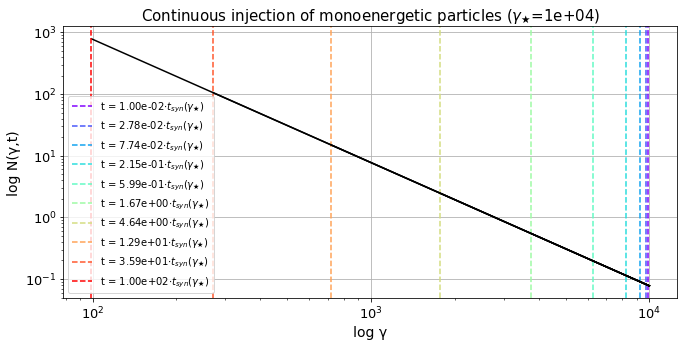

In [350]:
# Plot N(γ,t)
fig = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("log γ", fontsize=14)
plt.ylabel("log N(γ,t)", fontsize=14)
plt.title("Continuous injection of monoenergetic particles ($γ_★$={:0.0e})" .format(g_star), fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

times_syn = np.logspace(-2,2,10) # t/t_(syn)
times = [0]*len(times_syn) # sec
for i in range(len(times_syn)):
    times[i] = times_syn[i]*t_syn_star # sec
gmin_t = [f.g_evolutionB(g_star,x,B_star) for x in times]  # γ_min (t)

n = len(times_syn)
color = iter(plt.cm.rainbow(np.linspace(0, 1, n))) 
for i in range(len(gmin_t)):
    gg = np.linspace(gmin_t[i], g_star, 50) # range of γ, at time t
    N_t = [f.N_constant_mono(xx,Qo,A_star) for xx in gg] # N(γ,t)
    c = next(color)
    plt.plot(gg, N_t, c='k') # N(γ,t)
    plt.axvline(x=gmin_t[i], ls= '--', color=c, label="t = {:0.2e}" .format(times_syn[i])+"$ \cdot t_{syn} (γ_★)$") # γ_min(t)

plt.legend()

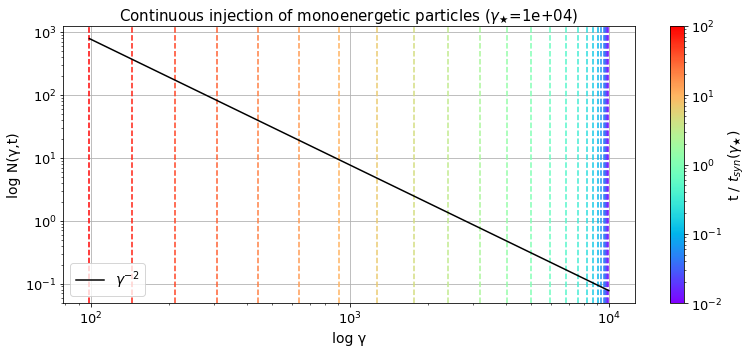

In [352]:
# Plot N(γ,t) with colorbar
fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111)  # Create a single subplot
plt.grid()
plt.xlabel("log γ", fontsize=14)
plt.ylabel("log N(γ,t)", fontsize=14)
plt.title("Continuous injection of monoenergetic particles ($γ_★$={:0.0e})" .format(g_star), fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

times_syn = np.logspace(-2,2,25) # t/t_(syn)
times = [0]*len(times_syn) # sec
for i in range(len(times_syn)):
    times[i] = times_syn[i]*t_syn_star # sec
gmin_t = [f.g_evolutionB(g_star,x,B_star) for x in times]  # γ_min (t)

#n = len(times_syn)
cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale)
for i, t in enumerate(times_syn):
    gg = np.linspace(gmin_t[i], g_star, 50) # range of γ, at time t
    N_t = [f.N_constant_mono(xx,Qo,A_star) for xx in gg] # N(γ,t)
    color = cmap(log_norm(t)) # Map the time to a color
    plt.axvline(x=gmin_t[i], ls= '--', color=color) # γ_min (t)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(times_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_★)$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.plot(gg, N_t, c='k', label="$γ^{-2}$") # N(γ,t) at t = max(times)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig('N(g,t)_case2.png')

$N_{tot}(t) = Q_ot $

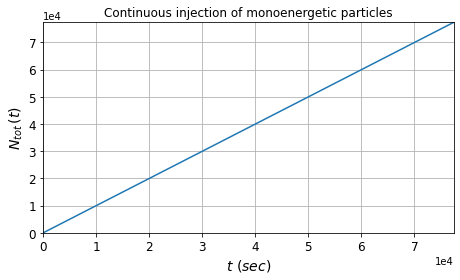

In [389]:
# N_tot (t)
Ntot_t = [f.Ntot_constant_mono(t,g_star,Qo,A_star) for t in times]
fig = plt.figure(figsize=(6.5,4))
#plt.plot(times_syn,Ntot_t)
plt.plot(times,Ntot_t)
plt.grid()
#plt.xlabel("$t / t_{syn}(γ_★)$", fontsize=14)
plt.xlabel("$t \ (sec)$", fontsize=14)
plt.ylabel("$N_{tot} \, (t)$", fontsize=14)
plt.xlim(0,max(times))
plt.ylim(0,max(Ntot_t))
plt.title("Continuous injection of monoenergetic particles", fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ticklabel_format(axis='both', scilimits=[-2, 2])
plt.tight_layout()
#plt.savefig('N_tot(t)_case2.png')

### III: Instant injection of power-law particle distribution

$N(\gamma,t) = Q_o \dfrac{\gamma^{-p}}{(1-\gamma At)^{2-p}} \qquad,\qquad \frac{\gamma_{min}}{1+A\gamma_{min} t}=\gamma_{min}(t) \le \gamma(t) \le \gamma_{max}(t)=\frac{\gamma_{max}}{1+A\gamma_{max} t}$

In [421]:
# Parameters
g_min = 10**3 # γ_min(0)
g_max = 10**4 # γ_max(0)
B_pl = 10 # Β = 10 Gauss
p = 3 # powerlaw slope (Also try for p=2)

m = 9.10956*(10**-28) # mass of particles (electron)
q = 4.80325*(10**-10) # charge of particles (electron)
st = 0.665245*(10**-24) # Thomson scattering cross section
c = 2.997925*(10**10) # speed of light
A_pl = (st*(B_pl**2))/(6*np.pi*m*c)

Qo = 1 # 1 particle
t_syn_min = f.time_synB(g_min,B_pl)
t_syn_max = f.time_synB(g_max,B_pl)
print("t_{syn}(γ_min) = %0.2e sec" %t_syn_min)
print("t_{syn}(γ_max) = %0.2e sec" %t_syn_max)
print("A = %0.2e sec^-1" %A_pl)
tr = (g_max-g_min)/(A_pl*g_max*g_min) #t_r (sec)
print("t_r = %0.2f sec" %tr)

t_{syn}(γ_min) = 7.74e+03 sec
t_{syn}(γ_max) = 7.74e+02 sec
A = 1.29e-07 sec^-1
t_r = 6964.34 sec


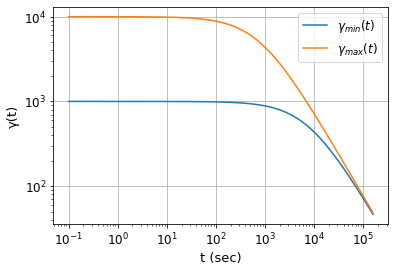

In [422]:
# γ_min(t) & γ_max(t)
times = np.logspace(-1, 5.2, 200) # t (sec)
gmin_t = [f.g_evolutionB(g_min,x,B_pl) for x in times]  # γ_min (t)
gmax_t = [f.g_evolutionB(g_max,x,B_pl) for x in times]  # γ_max (t)

plt.plot(times,gmin_t, label="$γ_{min}(t)$")
plt.plot(times,gmax_t, label="$γ_{max}(t)$")
plt.grid()
plt.legend(fontsize=12)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("t (sec)", fontsize=13)
plt.ylabel("γ(t)", fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=12)
#plt.title("$γ_{max}(t)$ & $γ_{min}(t)$", fontsize=13)

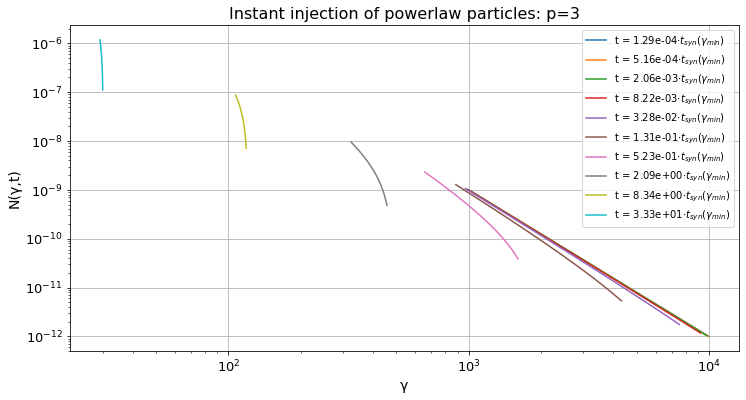

In [423]:
# Plot N(γ,t) 
times = np.logspace(0, 6, 500) # t (sec)
n = len(times)
gmin_t = [f.g_evolutionB(g_min,x,B_pl) for x in times]  # γ_min (t)
gmax_t = [f.g_evolutionB(g_max,x,B_pl) for x in times]  # γ_max (t)
# t_syn_min = f.time_synB(g_min,B_pl) # t_syn(γ_min)

fig = plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel("γ", fontsize=14)
plt.ylabel("N(γ,t)", fontsize=14)
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

for i in range (0,n,50): # take sample of values from "times"
    gg = np.logspace(np.log10(gmin_t[i]), np.log10(gmax_t[i]), 50)
    #plt.plot(gg,N_instant_pl2(gg,times[i],Qo,A_pl,p), label="t={:0.3f}" .format(times[i]))
    plt.plot(gg,f.N_instant_pl(gg,times[i],Qo,A_pl,p), label="t = {:0.2e}" .format(times[i]/t_syn_min) + "$\cdot t_{syn}(γ_{min})$")

plt.legend(fontsize=10)

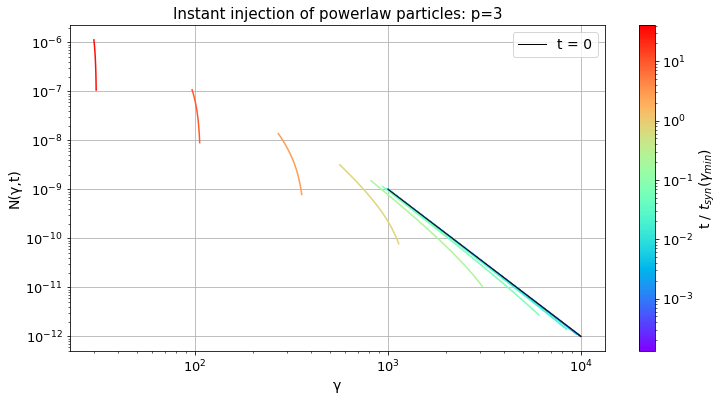

In [424]:
# Plot N(γ,t) with colorbar
times = np.logspace(0, 5.5, 500) # t (sec)
n = len(times)
gmin_t = [f.g_evolutionB(g_min,x,B_pl) for x in times]  # γ_min (t)
gmax_t = [f.g_evolutionB(g_max,x,B_pl) for x in times]  # γ_max (t)

# t_syn_min = f.time_synB(g_min,B_pl) # t_syn(γ_min)
times_syn = [0]*len(times) # t/t_syn(γ_min)
for i in range(len(times)):
    times_syn[i] = times[i]/t_syn_min # t/t_syn(γ_min)

fig = plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel("γ", fontsize=14)
plt.ylabel("N(γ,t)", fontsize=14)
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale)

for i in range (0,n,49): # take sample of values from "times"
    gg = np.logspace(np.log10(gmin_t[i]), np.log10(gmax_t[i]), 10**2)
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    plt.plot(gg,f.N_instant_pl(gg,times[i],Qo,A_pl,p),color=color)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(times_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_{min})$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

gg0 = np.logspace(np.log10(g_min), np.log10(g_max), 50)
plt.plot(gg0,f.N_instant_pl(gg0,0,Qo,A_pl,p),color='k', linewidth=1, label="t = 0")
plt.legend(fontsize=14)
#plt.savefig('N(g,t)_case3.png')

$\gamma \cdot N(\gamma,t) |_{\gamma_{min}(t)} = Q_o \frac{\gamma_{min}^{-p+1}(t)}{(1-A \gamma_{min}(t) t)^{2-p}} = Q_o \gamma_{min}^{1-p} (1+A\gamma_{min}t)$ <br>
For $ t \gg 1/A\gamma_{min} \, : \quad \gamma \cdot N(\gamma,t) |_{\gamma_{min}(t)} \approx Q_o A \gamma_{min}^{2-p} t \Rightarrow log(\gamma \cdot N(\gamma,t)) |_{\gamma_{min}(t)} = log(Q_o A \gamma_{min}^{2-p}) + log(t)$ <br>
For $ t \gg 1/A\gamma_{min} \, : \quad \gamma \cdot N(\gamma,t) |_{\gamma_{max}(t)} \approx Q_o A \gamma_{max}^{2-p} t \Rightarrow log(\gamma \cdot N(\gamma,t)) |_{\gamma_{max}(t)} = log(Q_o A \gamma_{max}^{2-p}) + log(t)$

In [433]:
print("log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚𝑖𝑛(𝑡) = %0.3f + logt" %np.log10(Qo*A_pl*(g_min**(2-p))))
print("log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚ax(𝑡) = %0.3f + logt" %np.log10(Qo*A_pl*(g_max**(2-p))))
print("log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚𝑖𝑛(𝑡) = log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚ax(𝑡) = %0.3f + logt" %np.log10(Qo*A_pl*(g_max**(2-2)))+" (p=2)")

log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚𝑖𝑛(𝑡) = -9.889 + logt
log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚ax(𝑡) = -10.889 + logt
log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚𝑖𝑛(𝑡) = log 𝛾⋅𝑁(𝛾,𝑡)|𝛾_𝑚ax(𝑡) = -6.889 + logt (p=2)


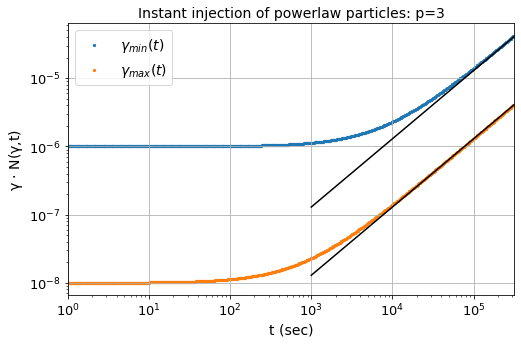

In [426]:
# Plot γ*N(γ_min(t),t) & γ*N(γ_max(t),t)
fig = plt.figure(figsize=(8,5))
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("t (sec)", fontsize=14)
plt.ylabel("γ $\cdot$ N(γ,t)", fontsize=14)
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xlim(min(times),max(times))

gN_min = [0]*len(times)
gN_max = [0]*len(times)
for i in range (0,len(times)):
    gg = np.logspace(np.log10(gmin_t[i]), np.log10(gmax_t[i]), 50)
    gN_min[i] = gmin_t[i]*max(f.N_instant_pl(gg,times[i],Qo,A_pl,p)) # max(N) is at γ_min(t)
    gN_max[i] = gmax_t[i]*min(f.N_instant_pl(gg,times[i],Qo,A_pl,p)) # min(N) is at γ_max(t)
plt.scatter(times,gN_min, s=5, label="$γ_{min}(t)$")
plt.scatter(times,gN_max, s=5, label="$γ_{max}(t)$")
times2 = np.logspace(3, 5.5, 500) # t (sec)
plt.plot(times2, Qo*A_pl*(g_min**(2-p)*times2),c='k')
plt.plot(times2, Qo*A_pl*(g_max**(2-p)*times2),c='k')
plt.legend(fontsize=14)
#plt.savefig('gN(g,t)minmax_case3.png')

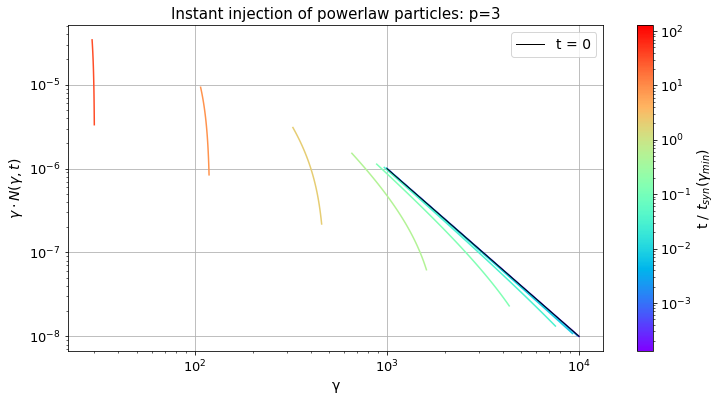

In [427]:
# Plot γ*N(γ,t) with colorbar
times = np.logspace(0, 6, 500) # t (sec)
n = len(times)
gmin_t = [f.g_evolutionB(g_min,x,B_pl) for x in times]  # γ_min (t)
gmax_t = [f.g_evolutionB(g_max,x,B_pl) for x in times]  # γ_max (t)

# t_syn_min = f.time_synB(g_min,B_pl) # t_syn(γ_min)
times_syn = [0]*len(times) # t/t_syn(γ_min)
for i in range(len(times)):
    times_syn[i] = times[i]/t_syn_min # t/t_syn(γ_min)

fig1 = plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel("γ", fontsize=14)
plt.ylabel("$γ \cdot N(γ,t)$", fontsize=14)
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale)

for i in range (0,n,50): # take sample of values from "times"
    gg = np.logspace(np.log10(gmin_t[i]), np.log10(gmax_t[i]), 50)
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    plt.plot(gg,gg*f.N_instant_pl(gg,times[i],Qo,A_pl,p),color=color)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(times_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_{min})$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

gg0 = np.logspace(np.log10(g_min), np.log10(g_max), 50)
plt.plot(gg0,gg0*f.N_instant_pl(gg0,0,Qo,A_pl,p),color='k', linewidth=1, label="t = 0")
plt.legend(fontsize=14)
#plt.savefig('gN(g,t)_case3.png')

$N_{tot}(t) = \int_{\gamma_{min}(t)}^{\gamma_{max}(t)} Q_o \dfrac{\gamma^{-p}}{(1-\gamma At)^{2-p}} \,d\gamma = \dfrac{Q_o}{1-p}(\gamma_{max}^{1-p}-\gamma_{min}^{1-p}) = constant$ <br>
Here we have: $Q_o = 1$, $γ_{min} = 10^3$, $γ_{max} = 10^4$, $p = 2$ $\quad \Rightarrow N_{tot}(t) = 0.9 \cdot 10^{-3}$ <br>
Here we have: $Q_o = 1$, $γ_{min} = 10^3$, $γ_{max} = 10^4$, $p = 3$ $\quad \Rightarrow N_{tot}(t) = 4.95 \cdot 10^{-7}$

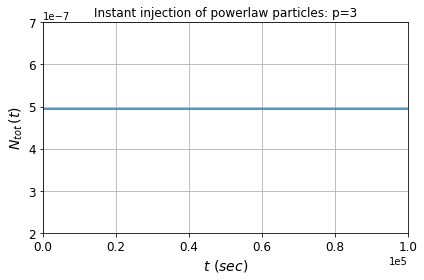

In [428]:
# N_tot(t)
tt = np.linspace(0, 10**5, 500) # t (sec)
Ntot_t = [f.N_tot_instant_pl(t,g_min,g_max,Qo,A_pl,p) for t in tt] # N_tot (t)
fig = plt.figure(figsize=(6,4))
plt.plot(tt,Ntot_t)
plt.grid()
plt.xlabel("$t \ (sec)$", fontsize=14)
plt.ylabel("$N_{tot} \, (t)$", fontsize=14)
plt.ylim(2*10**-7,7*10**-7)
plt.xlim(min(tt),max(tt))
plt.xlim()
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ticklabel_format(axis='both', scilimits=[-2, 2])
plt.tight_layout()
#plt.savefig('N_tot(t)_case3.png')

Repeat the same, for: $p=2$

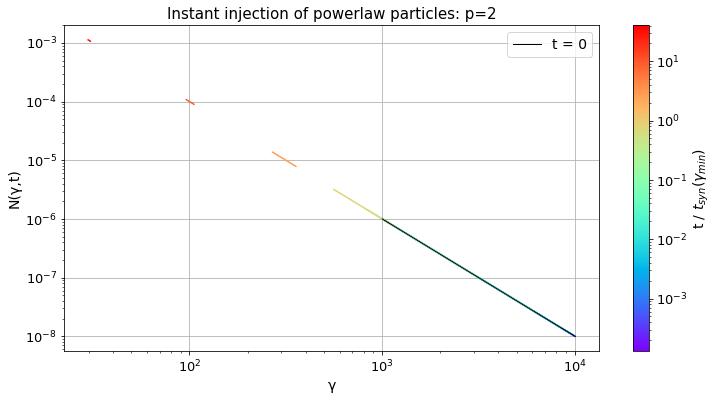

In [429]:
p2=2
# N(γ,t)
times = np.logspace(0, 5.5, 500) # t (sec)
n = len(times)
gmin_t = [f.g_evolutionB(g_min,x,B_pl) for x in times]  # γ_min (t)
gmax_t = [f.g_evolutionB(g_max,x,B_pl) for x in times]  # γ_max (t)

# t_syn_min = f.time_synB(g_min,B_pl) # t_syn(γ_min)
times_syn = [0]*len(times) # t/t_syn(γ_min)
for i in range(len(times)):
    times_syn[i] = times[i]/t_syn_min # t/t_syn(γ_min)

fig = plt.figure(figsize=(12,6))
plt.grid()
plt.xlabel("γ", fontsize=14)
plt.ylabel("N(γ,t)", fontsize=14)
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p2), fontsize=15)
plt.yscale("log")
plt.xscale("log")
plt.tick_params(axis='both', which='major', labelsize=13)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale)

for i in range (0,n,49): # take sample of values from "times"
    gg = np.logspace(np.log10(gmin_t[i]), np.log10(gmax_t[i]), 10**2)
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    plt.plot(gg,f.N_instant_pl(gg,times[i],Qo,A_pl,p2),color=color)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(times_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_{min})$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

gg0 = np.logspace(np.log10(g_min), np.log10(g_max), 50)
plt.plot(gg0,f.N_instant_pl(gg0,0,Qo,A_pl,p2),color='k', linewidth=1, label="t = 0")
plt.legend(fontsize=14)
#plt.savefig('N(g,t)_case3_p2.png')

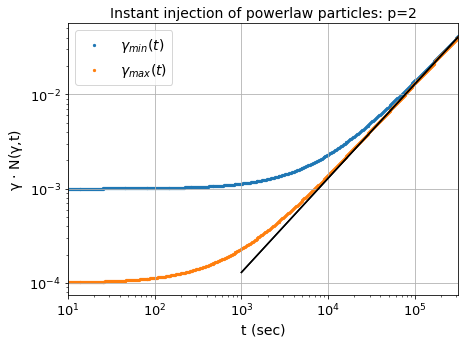

In [430]:
# γ*N(γ,t) : γ_min(t) & γ_max(t)
fig = plt.figure(figsize=(7,5))
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("t (sec)", fontsize=14)
plt.ylabel("γ $\cdot$ N(γ,t)", fontsize=14)
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p2), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.xlim(min(times)*10,max(times))

gN_min = [0]*len(times)
gN_max = [0]*len(times)
for i in range (0,len(times)):
    gg = np.logspace(np.log10(gmin_t[i]), np.log10(gmax_t[i]), 50)
    gN_min[i] = gmin_t[i]*max(f.N_instant_pl(gg,times[i],Qo,A_pl,p2)) # max(N) is at γ_min(t)
    gN_max[i] = gmax_t[i]*min(f.N_instant_pl(gg,times[i],Qo,A_pl,p2)) # min(N) is at γ_max(t)
plt.scatter(times,gN_min, s=5, label="$γ_{min}(t)$")
plt.scatter(times,gN_max, s=5, label="$γ_{max}(t)$")
times2 = np.logspace(3, 5.5, 500) # t (sec)
plt.plot(times2, Qo*A_pl*(g_min**(2-p2)*times2),c='k')
plt.plot(times2, Qo*A_pl*(g_max**(2-p2)*times2),c='k')
plt.legend(fontsize=14)
#plt.savefig('gN(g,t)minmax_case3_p2.png')

### IV: Continuous injection of power-law particle distribution

$t_r = \frac{γ_{max}-γ_{min}}{Aγ_{max} γ_{min}} \\[1ex]$
For the $\textbf{slow cooling}$ regime $(t \le t_r)$: <br>
$ N(\gamma,t) =
\begin{cases}
\dfrac{Q_o}{A(p-1)\gamma^2} \left(\gamma^{1-p}-\gamma_{max}^{1-p} \right) & \gamma_{max}(t) \le \gamma \le \gamma_{max}  \\[2ex]
\dfrac{Q_o\gamma^{-p-1}}{A(p-1)} \left[1-(1-\gamma At)^{1-p} \right] & \gamma_{min} \le \gamma \le \gamma_{max}(t) \\[2ex]
\dfrac{Q_o}{A(p-1)\gamma^2} \left[\gamma_{min}^{1-p}-\left(\dfrac{\gamma}{1-\gamma At}\right)^{1-p}\right] & \gamma_{min}(t) \le \gamma \le \gamma_{min}
\end{cases} $ <br>

For the $\textbf{fast cooling}$ regime $(t \ge t_r)$: <br>
$ N(\gamma,t) =
\begin{cases}
\dfrac{Q_o}{A(p-1)\gamma^2} \left(\gamma^{1-p}-\gamma_{max}^{1-p} \right) & \gamma_{min} \le \gamma \le \gamma_{max} \\[2ex]
\dfrac{Q_o}{A(p-1)\gamma^2} \left(\gamma_{min}^{1-p}-\gamma_{max}^{1-p}\right) & \gamma_{max}(t) \le \gamma \le \gamma_{min} \\[2ex]
\dfrac{Q_o}{A(p-1)\gamma^2} \left[\gamma_{min}^{1-p}-\left(\dfrac{\gamma}{1-\gamma At}\right)^{1-p}\right] & \gamma_{min}(t) \le \gamma \le \gamma_{max}(t)
\end{cases} $

In [458]:
# Parameters
g_min = 10**3 # γ_min(0)
g_max = 10**4 # γ_max(0)
B_pl = 10 # Β = 10 Gauss
p = 3 # powerlaw slope (Also try for p=2)

m = 9.10956*(10**-28) # mass of particles (electron)
q = 4.80325*(10**-10) # charge of particles (electron)
st = 0.665245*(10**-24) # Thomson scattering cross section
c = 2.997925*(10**10) # speed of light
A_pl = (st*(B_pl**2))/(6*np.pi*m*c)

Qo = 1 # 1 particle
t_syn_min = f.time_synB(g_min,B_pl)
t_syn_max = f.time_synB(g_max,B_pl)
print("t_{syn}(γ_min) = %0.2e sec" %t_syn_min)
print("t_{syn}(γ_max) = %0.2e sec" %t_syn_max)
print("A = %0.2e sec^-1" %A_pl)
tr = (g_max-g_min)/(A_pl*g_max*g_min) #t_r (sec)
print("t_r = %0.2f sec" %tr)

t_{syn}(γ_min) = 7.74e+03 sec
t_{syn}(γ_max) = 7.74e+02 sec
A = 1.29e-07 sec^-1
t_r = 6964.34 sec


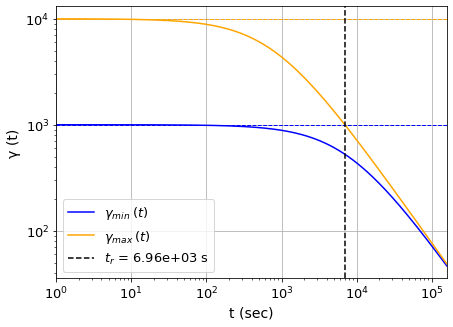

In [459]:
# γ_min(t) & γ_max(t) & t_r
times = np.logspace(-1, 5.2, 200) # t (sec)
gmin_t = [f.g_evolutionB(g_min,x,B_pl) for x in times]  # γ_min (t)
gmax_t = [f.g_evolutionB(g_max,x,B_pl) for x in times]  # γ_max (t)

fig = plt.figure(figsize=(7,5))
plt.plot(times,gmin_t, c='blue', label="$γ_{min} \: (t)$")
plt.plot(times,gmax_t, c='orange', label="$γ_{max} \: (t)$")
plt.axhline(g_max, linewidth=1, linestyle='--', c='orange') # γ_max
plt.axhline(g_min, linewidth=1, linestyle='--', c='blue') # γ_min
plt.axvline(tr, linestyle='--', c='k', label="$t_r$ = {:0.2e} s" .format(tr)) # t_r
plt.tick_params(axis='both', which='major', labelsize=13)
plt.grid()
plt.yscale("log")
plt.xscale("log")
plt.xlabel("t (sec)", fontsize=14)
plt.ylabel("γ (t)", fontsize=14)
plt.xlim(10*min(times),max(times))
plt.legend(fontsize=13)
#plt.savefig('g(t)_case4.png')

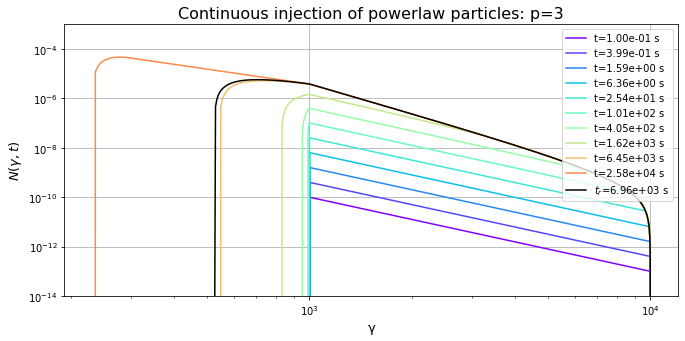

In [460]:
# Plot N(γ,t)
fig = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("γ", fontsize=13)
plt.ylabel("$N(γ,t)$", fontsize=13)
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.ylim(10**-14,10**-3)

times = np.logspace(-1, +5, 500) # t (sec)
color = iter(plt.cm.rainbow(np.linspace(0, 1, 12)))

for i in range (0,499,50):
    c = next(color)
    gg = np.linspace(f.g_evolutionA(g_min,times[i],A_pl), g_max, 2000)
    #gg = np.logspace(np.log10(f.g_evolutionA(g_min,times[i],A_pl)), np.log10(g_max), 1000)
    N_4 = [None]*len(gg)
    for j in range(len(gg)):
        N_4[j] = f.N_constant_pl(gg[j],times[i],Qo,A_pl,p,g_min,g_max) #N(γ,t)
    plt.plot(gg,N_4, label="t={:0.2e} s" .format(times[i]), c=c)

ggtr = np.linspace(f.g_evolutionA(g_min,tr,A_pl), g_max, 2000)
N_4tr = [None]*len(ggtr)
for j in range(len(ggtr)):
    N_4tr[j] = f.N_constant_pl(ggtr[j],tr,Qo,A_pl,p,g_min,g_max) #N(γ,t_r)
plt.plot(ggtr,N_4tr, label="$t_r$={:0.2e} s" .format(tr), c="k")

plt.legend(loc='upper right')

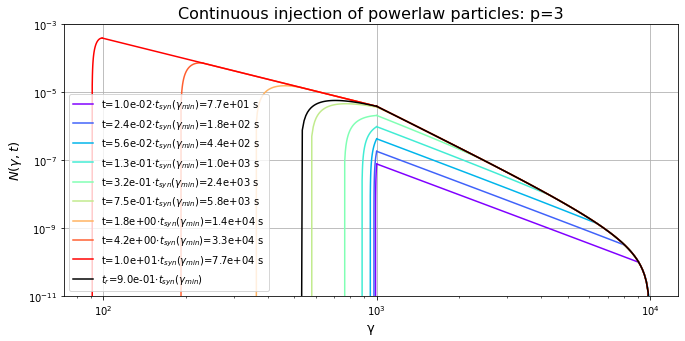

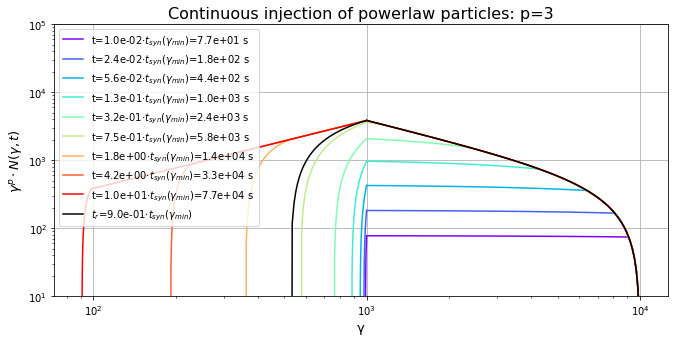

In [461]:
# Plot N(γ,t) - it works better if we study each range of γ values seperately
# Here we use function "f.Plot_N"
fig1 = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("γ", fontsize=13)
plt.ylabel("$N(γ,t)$", fontsize=13)
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-11,1e-3)

#t_cool_gmin = f.time_synA(g_min,A_pl) # t_syn_min
ii = np.logspace(-2.0, 1, 9) # time (multiples of t_syn(γ_max))
n = len(ii)
color = iter(plt.cm.rainbow(np.linspace(0, 1, n))) # different color for every time
time = ii*t_syn_min # time (sec)

for j in range (len(ii)):
    co = next(color)
    t_count = time[j]
    f.Plot_N(t_count, Qo, A_pl, p, g_min, g_max, co) # plot N(γ,t) for every t in "time" array
# t = tr (change from slow to fast cooling)
f.Plot_N(tr, Qo, A_pl, p, g_min, g_max, 'k')
plt.legend(fontsize=10)

# Plot (γ^p)*N(γ,t) - with function "f.Plot_Ngp"
fig2 = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("γ", fontsize=13)
plt.ylabel("$γ^p \cdot N(γ,t)$", fontsize=13)
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=16)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e+1,1e+5)

#t_cool_gmin = f.time_synA(g_min,A_pl) # t_syn_min
ii = np.logspace(-2.0, 1, 9) # time (multiples of t_syn(γ_max))
n = len(ii)
color = iter(plt.cm.rainbow(np.linspace(0, 1, n))) # different color for every time
time = ii*t_syn_min # time (sec)

for j in range (len(ii)):
    co = next(color)
    t_count = time[j]
    f.Plot_Ngp(t_count, Qo, A_pl, p, g_min, g_max, co) # plot N(γ,t) for every t in "time" array

# t = tr
f.Plot_Ngp(tr, Qo, A_pl, p, g_min, g_max, 'k') # plot N(γ,t) for t=t_r (change from slow to fast cooling)
plt.legend(fontsize=10)

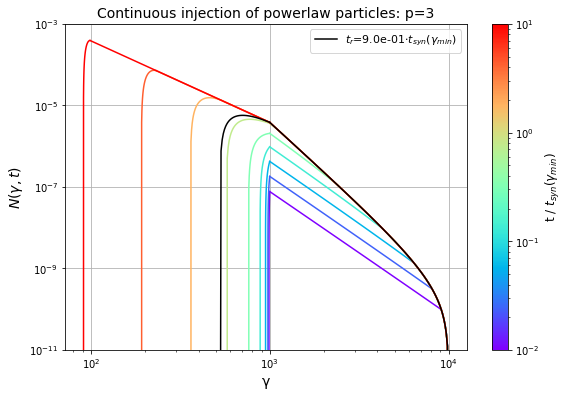

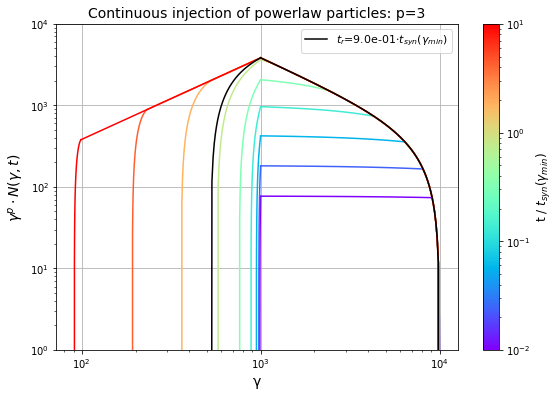

In [462]:
# Plot N(γ,t) , use function "f.Plot_N", with colorbar
fig1 = plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel("γ", fontsize=14)
plt.ylabel("$N(γ,t)$", fontsize=14)
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-11,1e-3)

#t_syn_min = f.time_synA(g_min,A_pl) # t_syn_min
times_syn = np.logspace(-2.0, 1, 9) # time (multiples of t_syn(γ_max))
times = times_syn*t_syn_min # time (sec)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale)

for i in range (len(times_syn)):
    t_counter = times[i]
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    f.Plot_N_noLabel(t_counter, Qo, A_pl, p, g_min, g_max, color) # plot N(γ,t) for every t in "time" array

#Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(times_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_{min})$", fontsize=12)

#t = tr (change from slow to fast cooling)
f.Plot_N(tr, Qo, A_pl, p, g_min, g_max, 'k')
plt.legend(fontsize=11)
#plt.tight_layout()
#plt.savefig('N(g,t)_case4.png')

# Plot (γ^p)*N(γ,t) , use function "f.Plot_N", with colorbar
fig2 = plt.figure(figsize=(9,6))
plt.grid()
plt.xlabel("γ", fontsize=14)
plt.ylabel("$γ^p \cdot N(γ,t)$", fontsize=14)
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e+0,1e+4)

#t_syn_min = f.time_synA(g_min,A_pl) # t_syn_min
times_syn = np.logspace(-2.0, 1, 9) # time (multiples of t_syn(γ_max))
times = times_syn*t_syn_min # time (sec)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale)

for i in range (len(times_syn)):
    t_counter = times[i]
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    f.Plot_Ngp_noLabel(t_counter, Qo, A_pl, p, g_min, g_max, color) # plot N(γ,t) for every t in "time" array

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(times_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_{min})$", fontsize=12)

#t = tr (change from slow to fast cooling)
f.Plot_Ngp(tr, Qo, A_pl, p, g_min, g_max, 'k')
plt.legend(fontsize=11)
#plt.tight_layout()
#plt.savefig('gN(g,t)_case4.png')

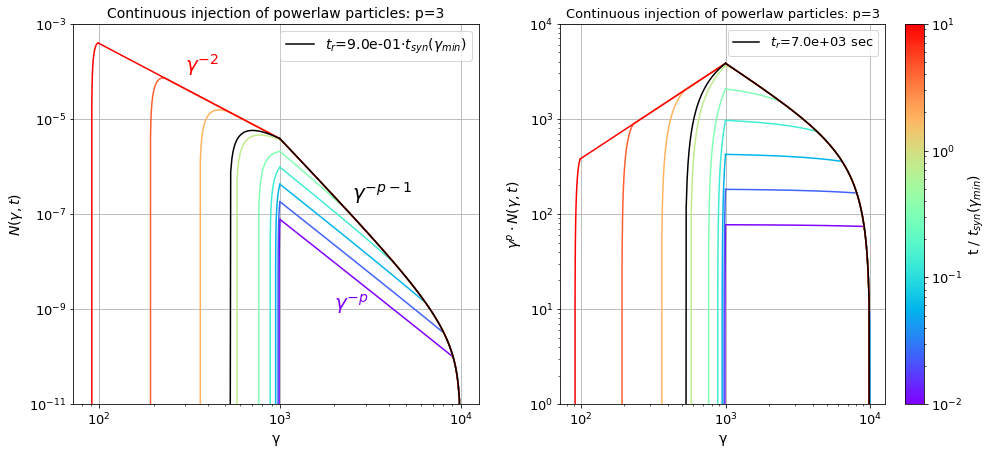

In [463]:
# Plot N(γ,t) and (γ^p)*N(γ,t) with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes[0].set_title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=14)
axes[0].set_xlabel("γ", fontsize=14)
axes[0].set_ylabel("$N(γ,t)$", fontsize=14)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_ylim(1e-11,1e-3)
axes[0].tick_params(axis='both', which='major', labelsize=13)
axes[0].grid()
axes[1].set_title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=13)
axes[1].set_xlabel("γ", fontsize=14)
axes[1].set_ylabel("$γ^p \cdot N(γ,t)$", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_ylim(1e+0,1e+4)
axes[1].tick_params(axis='both', which='major', labelsize=13)
axes[1].grid()

#t_syn_min = f.time_synA(g_min,A_pl) # t_syn_min
times_syn = np.logspace(-2.0, 1, 9) # time (multiples of t_syn(γ_max))
times = times_syn*t_syn_min # time (sec)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale) for both plots

for i in range (len(times_syn)): # Plot N(γ,t)
    t_counter = times[i]
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    f.Plot_N_noLabel_subplot(t_counter, Qo, A_pl, p, g_min, g_max, color,axes,0) # N(γ,t)

for i in range (len(times_syn)): # Plot (γ^p)*N(γ,t)
    t_counter = times[i]
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    f.Plot_Ngp_noLabel_subplot(t_counter, Qo, A_pl, p, g_min, g_max, color,axes,1) # (γ^p)*N(γ,t)

# Add a colorbar for axes[0] 
# sm1 = ScalarMappable(norm=log_norm, cmap=cmap)
# sm1.set_array(times_syn)
# cbar1 = fig.colorbar(sm, ax=axes[0])
# cbar1.set_label("t / $t_{syn}(γ_{min})$", fontsize=13)

# Add a colorbar for axes[1]
sm2 = ScalarMappable(norm=log_norm, cmap=cmap)
sm2.set_array(times_syn)
cbar2 = fig.colorbar(sm, ax=axes[1])
cbar2.set_label("t / $t_{syn}(γ_{min})$", fontsize=14)
cbar2.ax.tick_params(labelsize=13)
# Here both plots have the same colorbar no need to print it twice

# t = tr [N(γ,t)]
g1 = np.linspace(g_min, g_max, 60)
axes[0].plot(g1,f.N_constant_pl_iii(g1,tr,Qo,A_pl,p,g_min,g_max), c='k', label="$t_r$={:0.1e}" .format(tr/t_syn_min) + r"$\cdot t_{syn}(γ_{min})$")
g3 = np.linspace(f.g_evolutionA(g_min,tr,A_pl), g_min, 60)
axes[0].plot(g3,f.N_constant_pl_ii(g3,tr,Qo,A_pl,p,g_min,g_max), c='k')
axes[0].text(2*10**3,10**-9,"$γ^{-p}$", c=cmap(log_norm(times_syn[0])), fontsize=20)
axes[0].text(2.5*10**3,2*10**-7,"$γ^{-p-1}$", c='k', fontsize=20)
axes[0].text(3*10**2,10**-4,"$γ^{-2}$", c=cmap(log_norm(times_syn[8])), fontsize=20)
axes[0].legend(fontsize=14)
# t = tr [(γ^p)*N(γ,t)]
axes[1].plot(g1,(g1**p)*f.N_constant_pl_iii(g1,tr,Qo,A_pl,p,g_min,g_max), c='k', label="$t_r$={:0.1e} sec" .format(tr))
axes[1].plot(g3,(g3**p)*f.N_constant_pl_ii(g3,tr,Qo,A_pl,p,g_min,g_max), c='k')
axes[1].legend(fontsize=13)

#plt.savefig('N(g,t)_case4_all.png')

$N_{tot}(t) = \int_{\gamma_{min}(t)}^{\gamma_{max}} N(\gamma,t) \,d\gamma = \dfrac{Q_o(\gamma_{max}^{1-p}-\gamma_{min}^{1-p})}{1-p} \, t$ <br>
Here we have: $Q_o = 1$, $γ_{min} = 10^3$, $γ_{max} = 10^4$, $p = 2$ $\quad \Rightarrow N_{tot}(t) = 0.9 \cdot 10^{-3} \cdot t$ <br>
Here we have: $Q_o = 1$, $γ_{min} = 10^3$, $γ_{max} = 10^4$, $p = 3$ $\quad \Rightarrow N_{tot}(t) = 4.95 \cdot 10^{-7} \cdot t$

In [474]:
p=3
p2=2
print("p=3: N_tot(t) = %0.3e * t"%(1*((g_max**(1-p))-(g_min**(1-p)))/(1-p)))
print("p=2: N_tot(t) = %0.3e * t"%(1*((g_max**(1-p2))-(g_min**(1-p2)))/(1-p2)))

p=3: N_tot(t) = 4.950e-07 * t
p=2: N_tot(t) = 9.000e-04 * t


R^2 = 1.000000
intercept = 1.475e-16 +-1.515e-17 
slope = 4.950e-07 +- 1.884e-21


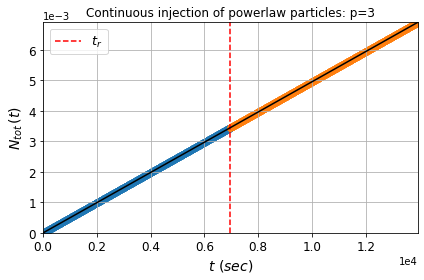

In [464]:
# N_tot(t)
tt1 = np.linspace(0,tr,1000) # t(sec) , t<tr
Ntot_1 = [f.Ntot_constant_pl_ltr(t,g_min,g_max,Qo,A_pl,p) for t in tt1]
tt2 = np.linspace(tr,2*tr,1000) # t(sec), t>tr
Ntot_2 = [f.Ntot_constant_pl_gtr(t,g_min,g_max,Qo,A_pl,p) for t in tt2]
tt = np.linspace(0,2*tr,1000) # t(sec)
Ntot_tt = [f.Ntot_constant_pl_ltr(t,g_min,g_max,Qo,A_pl,p) for t in tt]

fig = plt.figure(figsize=(6,4))
plt.scatter(tt1,Ntot_1)
plt.scatter(tt2,Ntot_2)
plt.axvline(tr,linestyle="--",c='r',label="$t_r$")
plt.grid()
plt.xlabel("$t \ (sec)$", fontsize=14)
plt.ylabel("$N_{tot} \, (t)$", fontsize=14)
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=12)
plt.xlim(min(tt),max(tt))
plt.ylim(min(Ntot_tt),max(Ntot_tt))
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ticklabel_format(axis='both', scilimits=[-2, 2])
plt.legend(fontsize=13)

# Linear fit for N_tot(t) [for all times: Ntot_tt]
xd = tt
yd = Ntot_tt
coeffs, V = np.polyfit(xd, yd, 1, cov=True)
#print(V,"\n", coeffs)
intercept = coeffs[-1]
slope = coeffs[-2]
minxd = np.min(xd)
maxxd = np.max(xd)
xl = np.array([minxd, maxxd])
yl = slope*xl + intercept

plt.plot(xl, yl, c='k')

poly = np.poly1d(coeffs)
ybar = np.sum(yd) / len(yd)
ssreg = np.sum((poly(xd) - ybar)**2)
sstot = np.sum((yd - ybar)**2)
Rsqr = ssreg/sstot
print("R^2 = %0.6f" %Rsqr) # 1 = perfect fit
print("intercept = %0.3e" %intercept,"+-%0.3e" %(np.sqrt(V[1][1])) , "\nslope = %0.3e" %slope,"+- %0.3e" %(np.sqrt(V[0][0])))
plt.tight_layout()
#plt.savefig('N_tot(t)_case4.png')

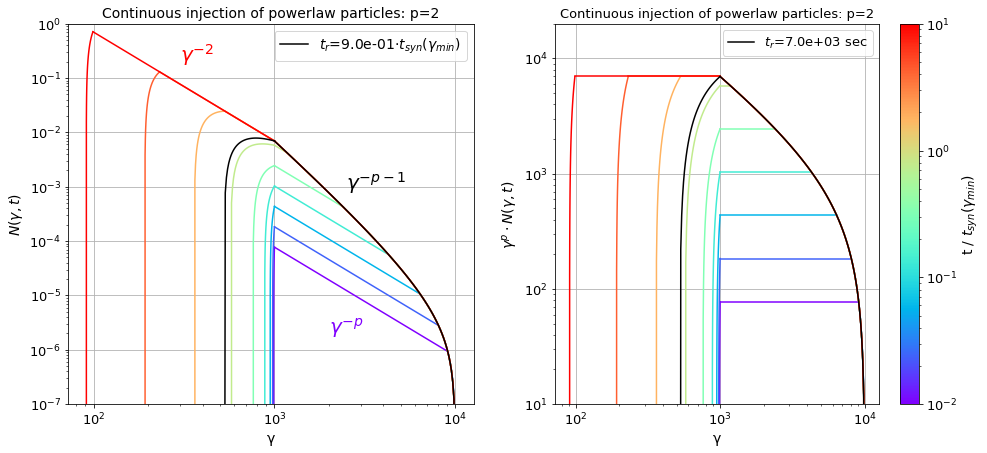

In [465]:
# Again for p=2 : Plot N(γ,t) and (γ^p)*N(γ,t) with subplots
p2 = 2
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes[0].set_title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p2), fontsize=14)
axes[0].set_xlabel("γ", fontsize=14)
axes[0].set_ylabel("$N(γ,t)$", fontsize=14)
axes[0].set_xscale("log")
axes[0].set_yscale("log")
axes[0].set_ylim(1e-7,1e+0)
axes[0].tick_params(axis='both', which='major', labelsize=13)
axes[0].grid()
axes[1].set_title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p2), fontsize=13)
axes[1].set_xlabel("γ", fontsize=14)
axes[1].set_ylabel("$γ^p \cdot N(γ,t)$", fontsize=14)
axes[1].set_xscale("log")
axes[1].set_yscale("log")
axes[1].set_ylim(1e+1,2*10**4)
axes[1].tick_params(axis='both', which='major', labelsize=13)
axes[1].grid()

#t_syn_min = f.time_synA(g_min,A_pl) # t_syn_min
times_syn = np.logspace(-2.0, 1, 9) # time (multiples of t_syn(γ_max))
times = times_syn*t_syn_min # time (sec)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(times_syn), vmax=max(times_syn)) # Normalize color (log scale) for both plots

for i in range (len(times_syn)): # Plot N(γ,t)
    t_counter = times[i]
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    f.Plot_N_noLabel_subplot(t_counter, Qo, A_pl, p2, g_min, g_max, color,axes,0) # N(γ,t)

for i in range (len(times_syn)): # Plot (γ^p)*N(γ,t)
    t_counter = times[i]
    tsyni = times_syn[i]
    color = cmap(log_norm(tsyni))
    f.Plot_Ngp_noLabel_subplot(t_counter, Qo, A_pl, p2, g_min, g_max, color,axes,1) # (γ^p)*N(γ,t)

# Add a colorbar for axes[0] 
# sm1 = ScalarMappable(norm=log_norm, cmap=cmap)
# sm1.set_array(times_syn)
# cbar1 = fig.colorbar(sm, ax=axes[0])
# cbar1.set_label("t / $t_{syn}(γ_{min})$", fontsize=13)

# Add a colorbar for axes[1]
sm2 = ScalarMappable(norm=log_norm, cmap=cmap)
sm2.set_array(times_syn)
cbar2 = fig.colorbar(sm, ax=axes[1])
cbar2.set_label("t / $t_{syn}(γ_{min})$", fontsize=14)
cbar2.ax.tick_params(labelsize=13)
# Here both plots have the same colorbar no need to print it twice

# t = tr [N(γ,t)]
g1 = np.linspace(g_min, g_max, 60)
axes[0].plot(g1,f.N_constant_pl_iii(g1,tr,Qo,A_pl,p2,g_min,g_max), c='k', label="$t_r$={:0.1e}" .format(tr/t_syn_min) + r"$\cdot t_{syn}(γ_{min})$")
g3 = np.linspace(f.g_evolutionA(g_min,tr,A_pl), g_min, 60)
axes[0].plot(g3,f.N_constant_pl_ii(g3,tr,Qo,A_pl,p2,g_min,g_max), c='k')
axes[0].text(2*10**3,2*10**-6,"$γ^{-p}$", c=cmap(log_norm(times_syn[0])), fontsize=20)
axes[0].text(2.5*10**3,9*10**-4,"$γ^{-p-1}$", c='k', fontsize=20)
axes[0].text(3*10**2,2*10**-1,"$γ^{-2}$", c=cmap(log_norm(times_syn[8])), fontsize=20)
axes[0].legend(fontsize=14)
# t = tr [(γ^p)*N(γ,t)]
axes[1].plot(g1,(g1**p2)*f.N_constant_pl_iii(g1,tr,Qo,A_pl,p2,g_min,g_max), c='k', label="$t_r$={:0.1e} sec" .format(tr))
axes[1].plot(g3,(g3**p2)*f.N_constant_pl_ii(g3,tr,Qo,A_pl,p2,g_min,g_max), c='k')
axes[1].legend(fontsize=13)

#plt.savefig('N(g,t)_case4_all_p2.png')

## Part 3: Synchrotron spectrum $J_{syn}(\nu,t)$

### I: Injection of monoenergetic particles

In [475]:
# Units: cgs
st = 0.665245*(10**-24) # Thomson scattering cross section
c = 2.997925*(10**10) # speed of light
m = 9.10956*(10**-28) # mass of particles (electron)
q = 4.80325*(10**-10) # charge of particles (electron)

In [476]:
g_star = 10**4 # γ = 10^4
B_star = 10 # Β = 10 Gauss
w_Bstar = (q*B_star)/(m*c) # ω_B gyro-frequency
Qo = 1 # 1 particle
print("t_{syn} = %0.2e sec" %(f.time_synB(g_star,B_star)))
t_syn_star = f.time_synB(g_star,B_star)

t_{syn} = 7.74e+02 sec


#### a. Initial injection

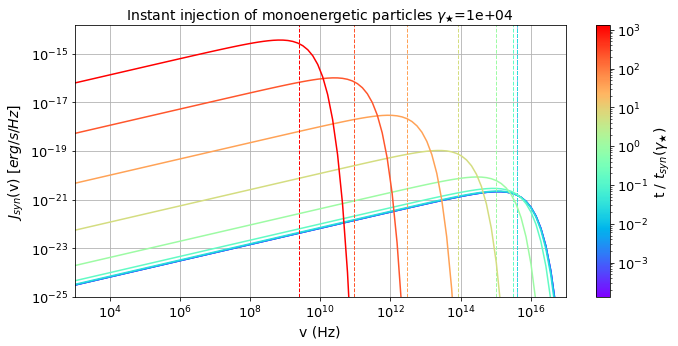

In [484]:
# J_syn(v,t) - initial injection of g_star
fig1 = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$J_{syn}$(v) [$erg/s/Hz$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Instant injection of monoenergetic particles $γ_★$={:0.0e}" .format(g_star), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(3,17,100) # Frequency range (Hz)
tt = np.logspace(-1, 6, 10) # Time range (sec)
tt_syn = tt/t_syn_star # t/t_syn(γmin)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(tt_syn), vmax=max(tt_syn)) # Normalize color (log scale)

for i in range (0,len(tt)):
    t = tt[i]
    tsyni = tt_syn[i]
    #c = next(color)
    color = cmap(log_norm(tsyni))
    g_t = f.g_evolutionB(g_star,t,B_star)
    JSyn_t = [f.N_instant_mono(g_t,Qo,g_star)*f.j_syn(x,g_t,B_star) for x in vv]
    vc_t = (3*w_Bstar/(4*np.pi))*(g_t**2) # characteristic frequency v_c(γ)
    plt.plot(vv,JSyn_t, c=color)
    plt.axvline(vc_t,linestyle="--",linewidth=1.0,c=color) # peak = 0.29*v_c(γ(t))

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("t / $t_{syn}(γ_★)$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-25,4*max(JSyn_t))
plt.xlim(min(vv),max(vv))
#plt.legend()
#plt.savefig('J_syn(v,t)_case1.png')

#### b. Time-constant injection

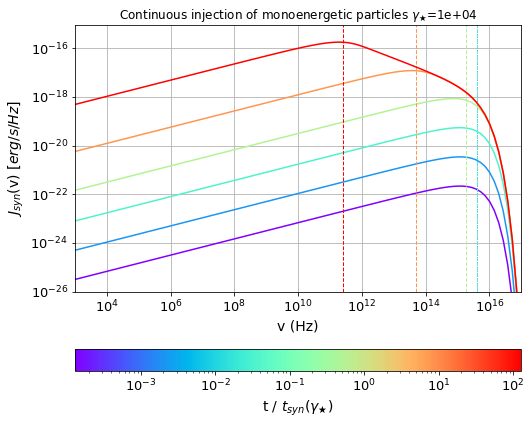

In [516]:
# J_syn(v,t) - continuous injection of g_star
fig1 = plt.figure(figsize=(8,7))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$J_{syn}$(v) [$erg/s/Hz$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Continuous injection of monoenergetic particles $γ_★$={:0.0e}" .format(g_star), fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(3,17,100) # Frequency range (Hz)
tt = np.logspace(-1, 5, 6) # Time range (sec)
tt_syn = tt/t_syn_star # t/t_syn(γmin)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(tt_syn), vmax=max(tt_syn)) # Normalize color (log scale)

for i in range (0,len(tt)):
    t = tt[i]
    tsyni = tt_syn[i]
    color = cmap(log_norm(tsyni))
    g_t = f.g_evolutionB(g_star,t,B_star) # γ_min(t)
    JSyn_t = [f.Jsyn_constant_mono(x,t,Qo,B_star,g_star) for x in vv]
    vc_t = (3*w_Bstar/(4*np.pi))*(g_t**2) # characteristic frequency v_c of γ_min(t)
    plt.plot(vv,JSyn_t, c=color)
    plt.axvline(vc_t,linestyle="--",linewidth=1.0,c=color)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca(), location='bottom')
cbar.set_label("t / $t_{syn}(γ_★)$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-26,5*max(JSyn_t))
plt.xlim(min(vv),max(vv))
#plt.legend()
#plt.savefig('J_syn(v,t)_case2.png')

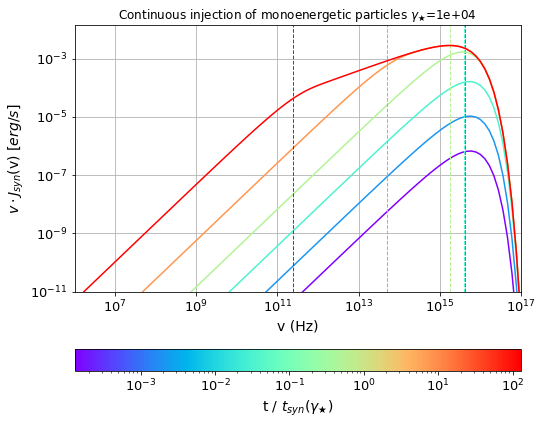

In [517]:
# v*J_syn(v,t) - continuous injection of g_star
fig1 = plt.figure(figsize=(8,7))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$v \cdot J_{syn}$(v) [$erg/s$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Continuous injection of monoenergetic particles $γ_★$={:0.0e}" .format(g_star), fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(6,17,100) # Frequency range (Hz)
tt = np.logspace(-1, 5, 6) # Time range (sec)
tt_syn = tt/t_syn_star # t/t_syn(γmin)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(tt_syn), vmax=max(tt_syn)) # Normalize color (log scale)

for i in range (0,len(tt)):
    t = tt[i]
    tsyni = tt_syn[i]
    color = cmap(log_norm(tsyni))
    g_t = f.g_evolutionB(g_star,t,B_star) # γ_min(t)
    JSyn_t = [f.Jsyn_constant_mono(x,t,Qo,B_star,g_star) for x in vv]
    vc_t = (3*w_Bstar/(4*np.pi))*(g_t**2) # characteristic frequency v_c of γ_min(t)
    plt.plot(vv,vv*JSyn_t, c=color)
    plt.axvline(vc_t,linestyle="--",linewidth=1.0,c=color)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca(), location='bottom')
cbar.set_label("t / $t_{syn}(γ_★)$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-11,5*max(vv*JSyn_t))
plt.xlim(min(vv),max(vv))
#plt.legend()
#plt.savefig('vJ_syn(v,t)_case2.png')

### II: Injection of power-law particle distribution

In [554]:
# Units: cgs
st = 0.665245*(10**-24) # Thomson scattering cross section
c = 2.997925*(10**10) # speed of light
m = 9.10956*(10**-28) # mass of particles (electron)
q = 4.80325*(10**-10) # charge of particles (electron)

In [555]:
# Parameters
g_min = 10**3 # γ_min(0)
g_max = 10**4 # γ_max(0)
B_pl = 10 # Β = 10 Gauss
p = 2 # powerlaw slope
Qo = 1 # 1 particle

A_pl = (st*(B_pl**2))/(6*np.pi*m*c)
t_syn_min = f.time_synB(g_min,B_pl) # t_syn(γmin)
t_syn_max = f.time_synB(g_max,B_pl) # t_syn(γmax)
print("t_{syn}(γ_min) = %0.2e sec" %t_syn_min)
print("t_{syn}(γ_max) = %0.2e sec" %t_syn_max)
print("A = %0.2e sec^-1" %A_pl)
tr = (g_max-g_min)/(A_pl*g_max*g_min) #t_r (sec)
print("t_r = %0.2f sec" %tr)

t_{syn}(γ_min) = 7.74e+03 sec
t_{syn}(γ_max) = 7.74e+02 sec
A = 1.29e-07 sec^-1
t_r = 6964.34 sec


#### a. Initial injection

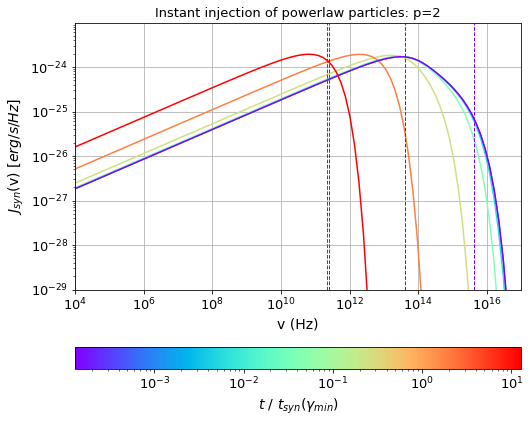

In [556]:
# J_syn(v,t) - initial injection of power-law
fig1 = plt.figure(figsize=(8,7))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$J_{syn}$(v) [$erg/s/Hz$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(4,17,100) # Frequency range (Hz)
tt = np.logspace(0, 5, 7) # Time range (sec)
tt_syn = tt/t_syn_min # t/t_syn(γmin)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(tt_syn), vmax=max(tt_syn)) # Normalize color (log scale)

for i in range (1,len(tt)-1):
    t = tt[i]
    tsyni = tt_syn[i]
    color = cmap(log_norm(tsyni))
    JSyn_t = [f.Jsyn_instant_pl(x,t,Qo,B_pl,p,g_min,g_max) for x in vv]
    plt.plot(vv,JSyn_t, c=color)

# v_c , at "t = tt[0]" and 't = tt[last]'
range_t = [0,len(tt)-1]
for i in range_t:
    t = tt[i]
    tsyni0 = tt_syn[i]
    color0 = cmap(log_norm(tsyni0))
    gmin_t = f.g_evolutionB(g_min,t,B_pl) # γ_min(t)
    gmax_t = f.g_evolutionB(g_max,t,B_pl) # γ_max(t)
    vc_t_min = (3*w_Bstar/(4*np.pi))*(gmin_t**2) # characteristic frequency v_c of γ_min(t)
    vc_t_max = (3*w_Bstar/(4*np.pi))*(gmax_t**2) # characteristic frequency v_c of γ_max(t)
    plt.axvline(vc_t_min,linestyle="--",linewidth=1.0,c=color0)
    plt.axvline(vc_t_max,linestyle="--",linewidth=1.0,c=color0)
    JSyn_t = [f.Jsyn_instant_pl(x,t,Qo,B_pl,p,g_min,g_max) for x in vv]
    plt.plot(vv,JSyn_t, c=color0)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca(), location='bottom')
cbar.set_label("$t$ / $t_{syn}(γ_{min})$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-29,5*max(JSyn_t))
plt.xlim(min(vv),max(vv))
#plt.legend()
#plt.savefig('J_syn(v,t)_case3.png')

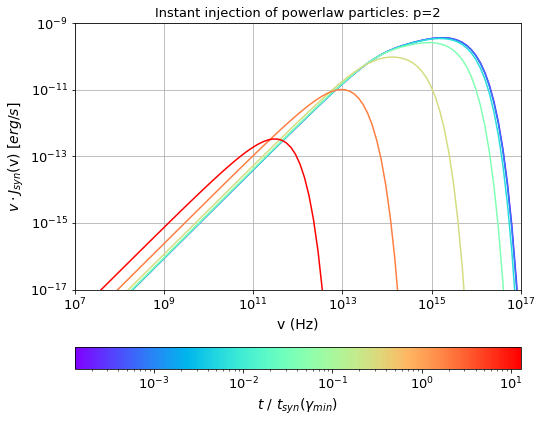

In [557]:
# v*J_syn(v,t) - initial injection of power-law
fig1 = plt.figure(figsize=(8,7))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$v \cdot J_{syn}$(v) [$erg/s$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(7,17,100) # Frequency range (Hz)
tt = np.logspace(0, 5, 7) # Time range (sec)
tt_syn = tt/t_syn_min # t/t_syn(γmin)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(tt_syn), vmax=max(tt_syn)) # Normalize color (log scale)

for i in range (0,len(tt)):
    t = tt[i]
    tsyni = tt_syn[i]
    color = cmap(log_norm(tsyni))
    JSyn_t = [f.Jsyn_instant_pl(x,t,Qo,B_pl,p,g_min,g_max) for x in vv]
    plt.plot(vv,vv*JSyn_t, c=color)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca(), location='bottom')
cbar.set_label("$t$ / $t_{syn}(γ_{min})$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-17,1e-9)
plt.xlim(min(vv),max(vv))
#plt.savefig('vJ_syn(v,t)_case3.png')

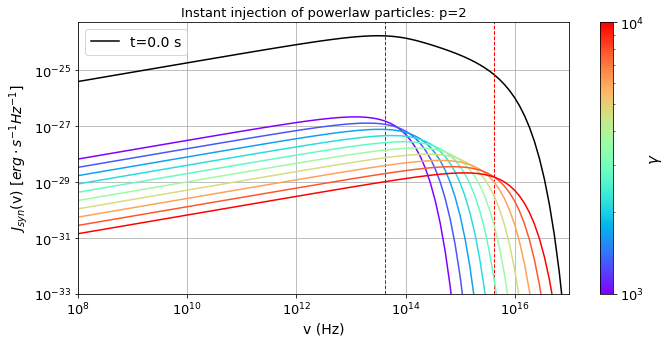

In [558]:
# J_syn(v,t=0) & j_syn components from different Lorentz factors γ_i
fig = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$J_{syn}$(v) [$erg \cdot s^{-1} Hz^{-1}$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Instant injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(8,17,100) # Frequency range (Hz)
t = 0 #sec
JSyn_0 = [f.Jsyn_instant_pl(x,t,Qo,B_pl,p,g_min,g_max) for x in vv] # J_syn(v,t=0)
plt.plot(vv,JSyn_0, label="t={:0.1f} s" .format(t), c='k')

gg = np.logspace(np.log10(g_min),np.log10(g_max),10)
cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(gg), vmax=max(gg)) # Normalize color (log scale)

vc_min = (3*w_Bstar/(4*np.pi))*(g_min**2) # characteristic frequency v_c of γ_min
vc_max = (3*w_Bstar/(4*np.pi))*(g_max**2) # characteristic frequency v_c of γ_max
color_min = cmap(log_norm(gg[0]))
color_max = cmap(log_norm(gg[9]))
plt.axvline(vc_min,linestyle="--",linewidth=1.0,c=color_min)
plt.axvline(vc_max,linestyle="--",linewidth=1.0,c=color_max)

for i in range(0,len(gg)):
    g = gg[i]
    color = cmap(log_norm(g))
    JSyn_g = [f.N_instant_pl(g,t,Qo,A_pl,p)*f.j_syn(x,g,B_pl) for x in vv]
    plt.plot(vv,JSyn_g, c=color)

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("$γ$", fontsize=15)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-33,3*max(JSyn_0))
plt.xlim(min(vv),max(vv))
plt.legend(fontsize=14)
#plt.savefig('J_syn(v,t)_case3_g.png')

#### b. Time-constant injection

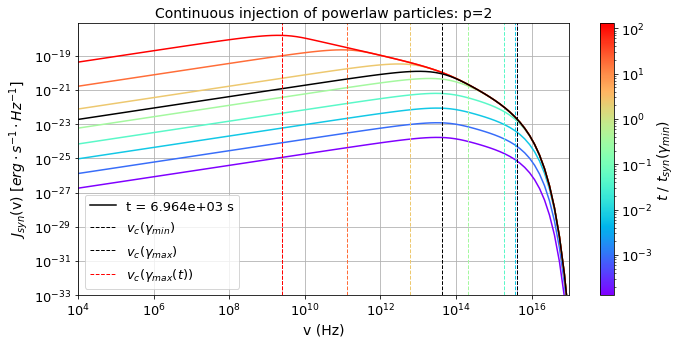

In [578]:
# J_syn(v,t) - continuous injection of power-law
fig1 = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$J_{syn}$(v) [$erg \cdot s^{-1} \cdot Hz^{-1}$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(4,17,100) # Frequency range (Hz)
tt = np.logspace(0, 6, 8) # Time range (sec)
tt_syn = tt/t_syn_min # t/t_syn(γmin)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(tt_syn), vmax=max(tt_syn)) # Normalize color (log scale)

for i in range (0,len(tt)):
    t = tt[i]
    tsyni = tt_syn[i]
    color = cmap(log_norm(tsyni))
    JSyn_t = [f.Jsyn_constant_pl(x,t,Qo,B_pl,p,g_min,g_max) for x in vv]
    plt.plot(vv,JSyn_t, c=color)
    gmax_t = f.g_evolutionB(g_max,t,B_pl) # γ_max(t)
    vc_max_t = (3*w_Bstar/(4*np.pi))*(gmax_t**2) # characteristic frequency v_c of γ_max(t)
    plt.axvline(vc_max_t,linestyle="--",linewidth=1.0,c=color)

# t = t_r
JSyn_tr = [f.Jsyn_constant_pl(x,tr,Qo,B_pl,p,g_min,g_max) for x in vv]
plt.plot(vv,JSyn_tr, label="t = {:0.3e} s" .format(tr), c='k')

# v_c (t=0)
vc_min0 = (3*w_Bstar/(4*np.pi))*(g_min**2) # characteristic frequency v_c of γ_min
vc_max0 = (3*w_Bstar/(4*np.pi))*(g_max**2) # characteristic frequency v_c of γ_max
plt.axvline(vc_min0,linestyle="--",linewidth=1.0,c='k', label="$v_c (γ_{min})$")
plt.axvline(vc_max0,linestyle="--",linewidth=1.0,c='k', label="$v_c (γ_{max})$")
# v_c (t = tt[7] >> tr)
plt.axvline(vc_max_t,linestyle="--",linewidth=1.0,c=color, label="$v_c (γ_{max}(t))$")

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("$t$ / $t_{syn}(γ_{min})$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-33,5*max(JSyn_t))
plt.xlim(min(vv),max(vv))
plt.legend(fontsize=13)
#plt.savefig('J_syn(v,t)_case4.png')

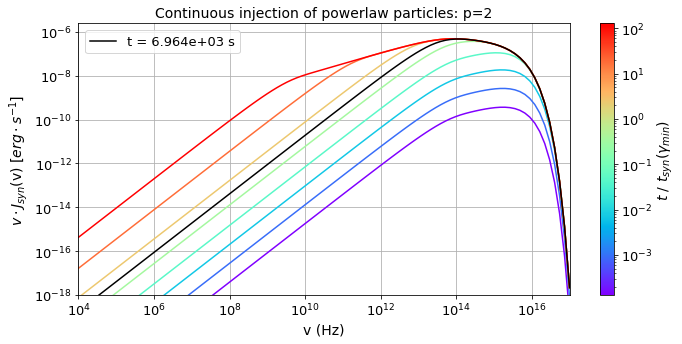

In [579]:
# v*J_syn(v,t) - continuous injection of power-law
fig2 = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("v (Hz)", fontsize=14)
plt.ylabel("$v \cdot J_{syn}$(v) [$erg \cdot s^{-1}$]", fontsize=14)
plt.yscale("log")
plt.xscale("log")
plt.title("Continuous injection of powerlaw particles: p={:0.0f}" .format(p), fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=13)

vv = np.logspace(4,17,100) # Frequency range (Hz)
tt = np.logspace(0, 6, 8) # Time range (sec)
tt_syn = tt/t_syn_min # t/t_syn(γmin)

cmap = plt.cm.rainbow
log_norm = LogNorm(vmin=min(tt_syn), vmax=max(tt_syn)) # Normalize color (log scale)

for i in range (0,len(tt)):
    t = tt[i]
    tsyni = tt_syn[i]
    color = cmap(log_norm(tsyni))
    JSyn_t = [f.Jsyn_constant_pl(x,t,Qo,B_pl,p,g_min,g_max) for x in vv]
    plt.plot(vv,vv*JSyn_t, c=color)

# t = t_r
JSyn_tr = [f.Jsyn_constant_pl(x,tr,Qo,B_pl,p,g_min,g_max) for x in vv]
plt.plot(vv,vv*JSyn_tr, label="t = {:0.3e} s" .format(tr), c='k')

# Add a colorbar
sm = ScalarMappable(norm=log_norm, cmap=cmap)
sm.set_array(tt_syn)
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("$t$ / $t_{syn}(γ_{min})$", fontsize=14)
cbar.ax.tick_params(labelsize=13)

plt.ylim(1e-18,5*max(vv*JSyn_t))
plt.xlim(min(vv),max(vv))
plt.legend(fontsize=13)
#plt.savefig('vJ_syn(v,t)_case4.png')

## Part 4: Luminosity & Flux

#### Appendix: Relativistic beaming

In [ ]:
# Doppler factor
def D(g,u):
    b = np.sqrt(1-(1/g**2))
    return 1/(g*(1-b*np.cos(u)))

In [ ]:
fig = plt.figure(figsize=(13,7))
uu = np.linspace(0,0.01,5*10**3)
ranget = [1,5,10,50,100,500,1000,10**4, 10**5, 1.46*10**6] # Lorentz factor γ
n = np.size(ranget)
color = iter(plt.cm.rainbow(np.linspace(0, 1, n)))
for i in ranget:
    c=next(color)
    plt.plot(uu,f.D(i,uu), label="γ={:0.1e}" .format(i),c=c)
    #plt.axvline(x=1/i, c=c)
plt.xlabel("θ")
plt.ylabel("D")
plt.yscale("log")
plt.xlim(-0.0002,max(uu))
plt.axhline(y=283, c="k")
plt.grid()
plt.legend(fontsize=10)

## Part 5: Toy Model

In [ ]:
# Values of parameters (cgs)
st = 0.665245*(10**-24) #Thomson scattering cross section
c = 2.997925*(10**10) #speed of light
#B = 0.506 #magnetic field
u = (B**2)/(8*np.pi) #magnetic field energy
m = 9.10956*(10**-28) #mass of particles (electron)
q = 4.80325*(10**-10) #charge of particles (electron)
#wB = (q*B)/(m*c) #ω_B gyro-frequency
#A = (4*st*c*u)/(3*m*c**2)
#constant = np.sqrt(3)*(q**2)*wB/c #constant for j_syn(γ)
pi = math.pi

# Values near the "true" parameters
D = 289 # Doppler shift for Jet comoving frame
Q = 10**46 # particles/sec (Injection rate) !! Updated, after fix
p = 2 # slope of powerlaw
gmin = 1.21*10**5
gmax = 1.46*10**6
tr = (gmax-gmin)/(A*gmax*gmin)
r = 350 #Mpc

h = 6.625*10**-27 # Planck constant (erg*sec)
ev = 1.602162*10**-12 # erg/eV
print("1 erg = %0.2e eV" %(1/ev))
print("1 eV = %0.2e erg" %ev)

We will focus on the Rest Frame: **no Doppler** <br>
At $t=0s$ we begin with $L(t,Q_0)$ = solution with constant $Q_0$ injection, this will be the "base" solution <br>
The solution, before & after the first change in injection rate Q at $t_{x1}$ is:

$L = L(t,Q_0)$                       , for $t \leq t_{x1}$ <br>
$L = L(t,Q_0) + L(t_1,abs(Q_1-Q_0))$ , for $t > t_{x1}$   , if $Q_1>Q_0$ (increase injection rate) <br>
$L = L(t,Q_0) - L(t_1,abs(Q_0-Q_1))$ , for $t > t_{x1}$   , if $Q_1<Q_0$ (decrease injection rate) <br>
where: $t_1 = t - t_{x1}$

In [ ]:
# Energy range (GRB observational data) :
vo_min = 2.41*(10**18) # Hz (10 keV) - this is v_obs = D*v
vo_max = 2.41*(10**21) # Hz (10 MeV) - this is v_obs
vr_min = vo_min/D # v_rest
vr_max = vo_max/D # v_rest
print("tr =",tr,"sec")

Now we present 2 simple examples to understand how this process works.
1. Increase Injection Rate one (random) time: $Q_1>Q_0$
2. Decrease Injection Rate one (random) time: $Q_1<Q_0$

In [ ]:
# Case 1: Increase
# Random times to change Q injection rate
Ntime = [random.uniform(np.log10(tr*10**(-1)),np.log10(tr*10**1)) for p in range(0,8)] # Uniform log10 times
Ntime.sort() # Ntime array, sort values in increasing order
for i in range(len(Ntime)):
    Ntime[i]=10**Ntime[i]   # Here we remove log10, make an array with t(sec)
    #print(Ntime[i])

timechange = Ntime[4] # (Random) Time for New injection rate Q1
Q0 = 10**44 # Initial injection rate
Q1 = 10**49 # New injection rate, after "timechange" (Q1>Q0)
timer = np.logspace(0, 6, 10) # Time range for plot (sec)
Lum_sum = [0]*len(timer) # Total L(t)

print("tr = %0.3e s" %tr)
print("Qo = %0.1e p/s" %Q0 ,", to = 0s")
print("Q1 = %0.1e p/s" %Q1,", t1 = %0.3e s" %timechange)

fig = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("t (sec)", fontsize=13)
plt.ylabel("$L_{syn}$(t) [erg/sec]", fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.title("Toy Model [Injection $Q_0γ^{-p}$, $Q_0<Q_1$]:" + " p={:0.0f}".format(p) + ", $γ_{min}$"+"={:0.2e}".format(gmin) + ", $γ_{max}$"+"={:0.2e}".format(gmax) + "$, t_r$"+"={:0.2f}s".format(tr) + " (B={:0.3f}G)".format(B))

for i in range (0,len(timer)):
    if timer[i] <= timechange: # before Q change, only initial Q0 rate
        Lum_sum[i] = f.Luminosity_constant_pl(timer[i],vr_min,vr_max,Q0,B,p,gmin,gmax)
        plt.scatter(timer[i],Lum_sum[i], c='r')
    else: # Now we have Q1 rate
        # L = L(t,Q0) + L(t1,abs(Q1-Q0)) for t>to1, if Q1>Q0 (increase)
        Lum_sum[i] = f.Luminosity_constant_pl(timer[i],vr_min,vr_max,Q0,B,p,gmin,gmax) + f.Luminosity_constant_pl(timer[i]-timechange,vr_min,vr_max,abs(Q1-Q0),B,p,gmin,gmax)
        plt.scatter(timer[i],Lum_sum[i], c='b')

plt.axvline(tr, linestyle="-", label="$t_r$"+"={:0.4f} s".format(tr))
textstr = '\n'.join((r'$v_{min,rest} = %.2e$' %vr_min + ' Hz', r'$v_{max,rest} = %.2e$' %vr_max + ' Hz', r'$t_{Q1} = %.2e$' %timechange + ' sec'))
props = dict(boxstyle='round',facecolor='wheat',alpha=0.5)
plt.text(0.78,0.22,textstr, horizontalalignment='center',verticalalignment='bottom', transform=fig.transFigure, fontsize=12, bbox=props)
plt.legend()

In [ ]:
# Case 2: Decrease
# Random times to change Q injection rate
Ntime = [random.uniform(np.log10(tr*10**(-1)),np.log10(tr*10**1)) for p in range(0,8)] # Uniform log10 times
Ntime.sort() # Ntime array, sort values in increasing order
for i in range(len(Ntime)):
    Ntime[i]=10**Ntime[i]   # Here we remove log10, make an array with t(sec)
    #print(Ntime[i])

timechange = Ntime[3] # (Random) Time for New injection rate Q1
Q0 = 10**50 # Initial injection rate
Q1 = 10**43 # New injection rate, after "timechange" (Q1>Q0)
timer = np.logspace(0, 8, 10) # Time range for plot (sec)
Lum_sum = [0]*len(timer) # Total L(t)

print("tr = %0.3e s" %tr)
print("Qo = %0.1e p/s" %Q0 ,", to = 0s")
print("Q1 = %0.1e p/s" %Q1,", t1 = %0.3e s" %timechange)

fig = plt.figure(figsize=(11,5))
plt.grid()
plt.xlabel("t (sec)", fontsize=13)
plt.ylabel("$L_{syn}$(t) [erg/sec]", fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.title("Toy Model [Injection $Q_0γ^{-p}$, $Q_0>Q_1$]:" + " p={:0.0f}".format(p) + ", $γ_{min}$"+"={:0.2e}".format(gmin) + ", $γ_{max}$"+"={:0.2e}".format(gmax) + "$, t_r$"+"={:0.2f}s".format(tr) + " (B={:0.3f}G)".format(B))

for i in range (0,len(timer)):
    if timer[i] <= timechange: # before Q change, only initial Q0 rate
        Lum_sum[i] = f.Luminosity_constant_pl(timer[i],vr_min,vr_max,Q0,B,p,gmin,gmax)
        plt.scatter(timer[i],Lum_sum[i], c='r')
    else: # Now we have Q1 rate
        # L = L(t,Q0) - L(t1,abs(Q1-Q0)) for t>to1, if Q1<Q0 (decrease)
        Lum_sum[i] = f.Luminosity_constant_pl(timer[i],vr_min,vr_max,Q0,B,p,gmin,gmax) - f.Luminosity_constant_pl(timer[i]-timechange,vr_min,vr_max,abs(Q1-Q0),B,p,gmin,gmax)
        plt.scatter(timer[i],Lum_sum[i], c='b')

plt.axvline(tr, linestyle="-", label="$t_r$"+"={:0.4f} s".format(tr))
textstr = '\n'.join((r'$v_{min,rest} = %.2e$' %vr_min + ' Hz', r'$v_{max,rest} = %.2e$' %vr_max + ' Hz', r'$t_{Q1} = %.2e$' %timechange + ' sec'))
props = dict(boxstyle='round',facecolor='wheat',alpha=0.5)
plt.text(0.78,0.22,textstr, horizontalalignment='center',verticalalignment='bottom', transform=fig.transFigure, fontsize=12, bbox=props)
plt.legend()

And finally we have the complete model for any number of injection rate changes in a given time frame:

In [ ]:
# Random times to change Q injection rate
many = 10 # How many times we change injections
Tchange = [random.uniform(np.log10(tr*(10**(-2))),np.log10(tr*(10**2))) for p in range(0,many)] # Uniform log10 § tr=0.5865 s [0.00586s - 58.65s]
Tchange.sort() #sort "Tchange" values in increasing order
for i in range(len(Tchange)):
    Tchange[i]=10**Tchange[i]
    print("t_",i+1,"= %0.2e s" %Tchange[i])

# Random injection rates Q to change at times
Qchange = [random.uniform(42,50) for p in range(0,many+1)] # many+1 values, we have original Qo injection t=0
# Qchange.sort() #do not need increasing order
for i in range(len(Qchange)):
    Qchange[i]=10**Qchange[i]
    print("Q_",i,'= %0.2e part/s' %Qchange[i])

Q0 = Qchange[0] # Initial injection rate
truetime = np.logspace(0, 7.5, 100) # Complete time range (sec)
Lum_sum_new = [0]*len(truetime) # Total L(t)
print("t_r =",tr,"s")

# Final Toy Model
fig = plt.figure(figsize=(16,7))
plt.grid()
plt.xlabel("t (sec)", fontsize=13)
plt.ylabel("$L_{syn}$(t) [erg/sec]", fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.title("Toy Model [Injection $Q_0(t)γ^{-p}$]:" + " p={:0.0f}".format(p) + ", $γ_{min}$"+"={:0.2e}".format(gmin) + ", $γ_{max}$"+"={:0.2e}".format(gmax) + "$, t_r$"+"={:0.3e}s".format(tr) + " (B={:0.3f}G)".format(B))

minusX = [0]*many # ΔQ between Q rates, 1 value every t_change
signX = [0]*many # >0 or <0 or =0
for i in range(0,len(minusX)):
    minusX[i] = Qchange[i]-Qchange[i+1] # Q0-Q1
    if minusX[i]>0:   # Q0>Q1 decrease
        signX[i] = -1 # - if Q1<Q0 decrease
    elif minusX[i]<0: # Q0<Q1 increase
        signX[i] = +1 # + if Q1>Q0 increase
    else:             # Q0=Q1
        signX[i] = 0

for j in range (0,len(truetime)):
    timer = truetime[j] # local time value for this run
    if timer <= Tchange[0]:       # only run Q0
        Lum_sum_new[j] = f.Luminosity_constant_pl(timer,vr_min,vr_max,Qchange[0],B,p,gmin,gmax)
        plt.scatter(timer,Lum_sum_new[j], c='r')
    else:
        for k in range(1,len(Tchange)): # check if we are between inj. times
            if timer <= Tchange[k] and timer >= Tchange[k-1]:
                Lum_sum_new[j] = f.Luminosity_constant_pl(timer,vr_min,vr_max,Qchange[0],B,p,gmin,gmax)
                for l in range(1,k+1):
                    Lum_sum_new[j] = Lum_sum_new[j] + signX[l-1]*f.Luminosity_constant_pl(timer-Tchange[l-1],vr_min,vr_max,abs(minusX[l-1]),B,p,gmin,gmax)
        if timer > Tchange[len(Tchange)-1]: # case: after final injection
            Lum_sum_new[j] = f.Luminosity_constant_pl(timer,vr_min,vr_max,Qchange[0],B,p,gmin,gmax)
            for l in range(1,len(Tchange)+1):
                Lum_sum_new[j] = Lum_sum_new[j] + signX[l-1]*f.Luminosity_constant_pl(timer-Tchange[l-1],vr_min,vr_max,abs(minusX[l-1]),B,p,gmin,gmax)
        plt.scatter(timer,Lum_sum_new[j], c='r')

plt.axvline(tr, linestyle="-", label="$t_r$"+"={:0.3e} s".format(tr)) # t=tr line in plot
for i in range(len(Tchange)): # t_change lines in plot
    plt.axvline(Tchange[i], linestyle="-", linewidth=1.0, label="$t_{:0.0f}$".format(i+1)+"={:0.3e} s".format(Tchange[i]) + ", $Q_{:0.0f}$".format(i+1)+"={:0.3e} p/s".format(Qchange[i+1]),c='k')


textstr = '\n'.join((r'$v_{min,rest} = %.2e$' %vr_min + ' Hz', r'$v_{max,rest} = %.2e$' %vr_max + ' Hz', "$Q_{0} = %.3e p/s$" %Qchange[0]))
props = dict(boxstyle='round',facecolor='wheat',alpha=0.5)
plt.text(0.78,0.18,textstr, horizontalalignment='center',verticalalignment='bottom', transform=fig.transFigure, fontsize=12, bbox=props)
plt.legend()

In [ ]:
# Use values from above, just Doppler shift them
truetimeD = [0]*len(truetime)
for i in range(len(truetime)):
    truetimeD[i] = truetime[i]/D  # t_obs = t/D

Lum_sum_newD = [0]*len(Lum_sum_new)
for i in range(len(Lum_sum_new)):
    Lum_sum_newD[i] = Lum_sum_new[i]*(D**3) # J_obs = J*D**3

TchangeD = [0]*len(Tchange)
for i in range(len(Tchange)):
    TchangeD[i] = Tchange[i]/D  # t_obs = t/D

trD = tr/D

for i in range(len(TchangeD)):
    print("t_",i+1,"= %0.2e s" %TchangeD[i])
for i in range(len(Qchange)):
    print("Q_",i,'= %0.2e part/s' %Qchange[i])
print("t_rD =",trD,"s")

# Final Toy Model
fig = plt.figure(figsize=(16,7))
plt.grid()
plt.xlabel("t (sec)", fontsize=13)
plt.ylabel("$L_{syn}$(t) [erg/sec]", fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.title("Toy Model [Injection $Q_0(t)γ^{-p}$]:" + " p={:0.0f}".format(p) + ", $γ_{min}$"+"={:0.2e}".format(gmin) + ", $γ_{max}$"+"={:0.2e}".format(gmax) + "$, t_r$"+"={:0.3e}s".format(tr) + ", D={:0.0f}" .format(D) + " (B={:0.3f}G)".format(B))

for j in range (0,len(truetimeD)):
    timerD = truetimeD[j]
    plt.scatter(timerD,Lum_sum_newD[j], c='r')

plt.axvline(trD, linestyle="-", label="$t_{r,obs}$"+"={:0.3e} s".format(trD)) # t=tr line in plot
for i in range(len(TchangeD)): # t_change lines in plot
    plt.axvline(TchangeD[i], linestyle="-", linewidth=1.0, label="$t_{obs,}$"+"$_{" + str(i+1) + "}$" +"={:0.3e} s".format(TchangeD[i]) + ", $Q_{" + str(i+1) + "}$" + "={:0.3e} p/s".format(Qchange[i+1]),c='k')
    #plt.axvline(TchangeD[i], linestyle="-", linewidth=1.0, label="$t_{obs}$"+r"$_{}$".format(i+1)+"={:0.3e} s".format(TchangeD[i]) + ", $Q_{:0.0f}$".format(i+1)+"={:0.3e} p/s".format(Qchange[i+1]),c='k')

textstr = '\n'.join((r'$v_{min,obs} = %.2e$' %vo_min + ' Hz', r'$v_{max,obs} = %.2e$' %vo_max + ' Hz', "$Q_{0} = %.3e p/s$" %Qchange[0]))
props = dict(boxstyle='round',facecolor='wheat',alpha=0.5)
plt.text(0.82,0.18,textstr, horizontalalignment='center',verticalalignment='bottom', transform=fig.transFigure, fontsize=12, bbox=props)
plt.legend()

# OLD

In [ ]:
# Values of parameters (cgs)
# Here we have values from Fillip's fits

st = 0.665245*(10**-24) #Thomson scattering cross section
c = 2.997925*(10**10) #speed of light
B = 0.506 #magnetic field
u = (B**2)/(8*np.pi) #magnetic field energy
m = 9.10956*(10**-28) #mass of particles (electron)
q = 4.80325*(10**-10) #charge of particles (electron)
wB = (q*B)/(m*c) #ω_B gyro-frequency
A = (4*st*c*u)/(3*m*c**2)
constant = np.sqrt(3)*(q**2)*wB/c #constant for j_syn(γ)
pi = math.pi

# Values near the "true" parameters
D = 289 # Doppler shift for Jet comoving frame
Q = 10**46 # particles/sec (Injection rate) !! Updated, after fix
p = 2 # slope of powerlaw
gmin = 1.21*10**5
gmax = 1.46*10**6
tr = (gmax-gmin)/(A*gmax*gmin)
r = 350 #Mpc

h = 6.625*10**-27 # Planck constant (erg*sec)
ev = 1.602162*10**-12 # erg/eV
print("1 erg = %0.2e eV" %(1/ev))
print("1 eV = %0.2e erg" %ev)